<a href="https://colab.research.google.com/github/smarulandas/Teoria_Aprendizaje_De_Maquina_-Machine_Learning-/blob/main/PARCIAL_1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Base de datos con pandas**

Descargar la base de datos y mostrar los primeros 5 filas y todas las columnas de la base de datos

In [73]:
import numpy as np
import pandas as pd
from IPython.display import display

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Montar Google Drive (requiere autorización interactiva)
from google.colab import drive

# ID del archivo de tu Drive (extraído del enlace que compartiste)
file_id = '1fHz80kWNwG9MNnwhiwh8fxHK4FTWsobA'

# Construir la URL de descarga directa
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

# Cargar los datos
try:
    data = pd.read_csv(download_url)
    print("Datos cargados exitosamente!")
    print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    print("Asegúrate de que el archivo sea accesible públicamente o usa mount()")

# Mostrar las primeras 6 filas con todas las columnas
display(data.head(6))  # <- Cambiado a 6 filas

Datos cargados exitosamente!
Filas: 2930, Columnas: 82


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500


In [74]:
def count_object_columns(df):
  """
  Cuenta el número de columnas de tipo 'object' en un DataFrame.

  Args:
    df: El DataFrame a analizar.

  Returns:
    El número de columnas de tipo 'object'.
  """
  object_columns_count = df.select_dtypes(include=['object']).shape[1]
  return object_columns_count

# Uso de la función
num_object_columns = count_object_columns(data)
print(f"El número de columnas de tipo 'object' es: {num_object_columns}")

El número de columnas de tipo 'object' es: 43


In [75]:
def count_numeric_columns(df):
  """
  Cuenta el número de columnas de tipo numérico (int, float) en un DataFrame.

  Args:
    df: El DataFrame a analizar.

  Returns:
    El número de columnas de tipo numérico.
  """
  numeric_columns_count = df.select_dtypes(include=np.number).shape[1]
  return numeric_columns_count

# Uso de la función
num_numeric_columns = count_numeric_columns(data)
print(f"El número de columnas de tipo numérico es: {num_numeric_columns}")

El número de columnas de tipo numérico es: 39


# **2. Definición de variables predictoras (X) y variable objetivo (Y)**

 - Variable objetivo (Y):  Es lo que se quiere predecir o estimar a partir de otras variables. En otras palabras, es la "respuesta" o el "resultado" que el modelo intenta aprender.

 - Variables predictorias (X): Son los datos que se usa para hacer la predicción. El modelo analiza estas variables para intentar "adivinar" o calcular el valor de Y.

<br>

 - **Se quiere predecir el valor de venta de una casa, por tanto, Y = SalePrice
 (valor de venta de una casa)**

1. Eliminación de columnas que contienen más del 50% de datos faltantes

In [76]:
def limpieza_columnas_faltantes(df, umbral=50):
    """
    Elimina columnas con más del umbral% de datos faltantes y muestra reporte detallado

    Args:
        df (pd.DataFrame): DataFrame a procesar
        umbral (float): Umbral porcentual para eliminar columnas (0-100)

    Returns:
        pd.DataFrame: DataFrame limpio
    """
    # Calcular porcentaje de faltantes
    missing_percent = df.isnull().mean() * 100

    # Identificar columnas problemáticas
    cols_to_drop = missing_percent[missing_percent > umbral].index.tolist()

    # Reporte de eliminación
    print("="*50)
    print("ANÁLISIS DE DATOS FALTANTES")
    print("="*50)

    if cols_to_drop:
        print("\nCOLUMNAS ELIMINADAS:")
        for col in cols_to_drop:
            print(f"- {col}: {missing_percent[col]:.2f}% faltantes")

        # Eliminar columnas (sin modificar el original)
        df_cleaned = df.drop(columns=cols_to_drop)

        print("\n" + "="*50)
        print("RESULTADO:")
        print(f"• Columnas eliminadas: {len(cols_to_drop)}")
        print(f"• Columnas restantes: {df_cleaned.shape[1]}")
        print(f"• Filas restantes: {df_cleaned.shape[0]}")
        print("="*50)
    else:
        print("\nNo se eliminaron columnas (ninguna supera el umbral del {umbral}% de faltantes)")
        df_cleaned = df.copy()

    return df_cleaned

# Ejecutar la limpieza (siempre sobre el data original)
data_cleaned = limpieza_columnas_faltantes(data, umbral=50)

ANÁLISIS DE DATOS FALTANTES

COLUMNAS ELIMINADAS:
- Alley: 93.24% faltantes
- Mas Vnr Type: 60.58% faltantes
- Pool QC: 99.56% faltantes
- Fence: 80.48% faltantes
- Misc Feature: 96.38% faltantes

RESULTADO:
• Columnas eliminadas: 5
• Columnas restantes: 77
• Filas restantes: 2930


In [77]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

Ahora, se eliminara las columnas que no aportan informacion a la predicción del precio de venta de la casa

In [78]:
col_drop= ['PID', 'Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Bsmt Half Bath', '3Ssn Porch', 'Pool Area', 'Misc Val', 'Order', 'Fireplace Qu']
data_cleaned.drop(columns = col_drop, inplace = True)
print(f"Nuevo shape del DataFrame: {data_cleaned.shape}")

Nuevo shape del DataFrame: (2930, 64)


se imprime la actualizacion de las columnas del datafrem

In [79]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2930 non-null   int64  
 1   MS Zoning       2930 non-null   object 
 2   Lot Frontage    2440 non-null   float64
 3   Lot Area        2930 non-null   int64  
 4   Lot Shape       2930 non-null   object 
 5   Land Contour    2930 non-null   object 
 6   Lot Config      2930 non-null   object 
 7   Land Slope      2930 non-null   object 
 8   Neighborhood    2930 non-null   object 
 9   Condition 1     2930 non-null   object 
 10  Bldg Type       2930 non-null   object 
 11  House Style     2930 non-null   object 
 12  Overall Qual    2930 non-null   int64  
 13  Overall Cond    2930 non-null   int64  
 14  Year Built      2930 non-null   int64  
 15  Year Remod/Add  2930 non-null   int64  
 16  Roof Style      2930 non-null   object 
 17  Exterior 1st    2930 non-null   o

# 3. División del conjunto de datos en entrenamiento y prueba (70% train) (30% test)

Se separan los datos en un conjunto de entrenamiento (train) y otro de prueba (test) para evaluar el desempeño real del modelo

In [80]:
from sklearn.model_selection import train_test_split

# 1. Separar características (X) y variable objetivo (y)
# Asumiendo que tu variable objetivo se llama 'SalePrice'
X = data_cleaned.drop(columns=['SalePrice'])  # Todas las columnas excepto la objetivo
y = data_cleaned['SalePrice']                # Solo la columna objetivo

# 2. Dividir los datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,       # 30% para test
    random_state=42      # Semilla para reproducibilidad
)

# 3. Mostrar las dimensiones resultantes
print("="*50)
print("DIVISIÓN DE DATOS")
print("="*50)
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(data_cleaned)*100:.1f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(data_cleaned)*100:.1f}%)")
print("="*50)

DIVISIÓN DE DATOS
Conjunto de entrenamiento: 2051 muestras (70.0%)
Conjunto de prueba: 879 muestras (30.0%)


#**4. Preprocesamiento de características**

Se aplican transformaciones como imputación de valores faltantes, escalado, codificación de variables categóricas, y selección de variables.

# **Imputación de valores faltantes en variables categóricas de salida usando la moda**

In [81]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identificar columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# 2. Transformadores para numéricas (imputación + escalado)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputación con mediana (para numéricas)
    ('scaler', StandardScaler())                    # Estandarización
])

# 3. Transformadores para categóricas (imputación + one-hot)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con moda (most_frequent)
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Codificación one-hot
])

# 4. Combinar en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 5. Mostrar resumen de las transformaciones
print("="*50)
print("PREPROCESADOR CONFIGURADO")
print("="*50)
print(f"Variables numéricas: {len(numeric_cols)}")
print(f"Variables categóricas: {len(categorical_cols)}")
print("\nEstrategias de imputación:")
print("- Numéricas: Mediana")
print("- Categóricas: Moda (most_frequent)")
print("="*50)

PREPROCESADOR CONFIGURADO
Variables numéricas: 31
Variables categóricas: 32

Estrategias de imputación:
- Numéricas: Mediana
- Categóricas: Moda (most_frequent)


# Definición de clase personalizada de preprocesamiento compatible con scikit-learn

**Prompt:** Diseña una clase PriceOrdinalEncoder en scikit-learn que codifique variables categóricas ordinalmente según la media del target (SalePrice), manteniendo las numéricas sin escalar. La clase debe: 1) Automáticamente detectar columnas numéricas si no se especifican, 2) Imputar missing values (moda para categóricas, mediana para numéricas), 3) Ordenar categorías por el promedio del target y codificarlas con OrdinalEncoder, 4) Opcionalmente incluir el target en el output. Usa esta clase para transformar las variables categóricas del dataset de housing (Xtrain, Xtest), incluyendo columnas como 'Neighborhood', 'Kitchen Qual', y 'Foundation'. Asegúrate de manejar valores desconocidos en test asignándoles -1

In [82]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

class PriceOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None, numeric_vars=None):
        self.variables = variables
        self.numeric_vars = numeric_vars
        self.category_orders = {}
        self.encoder = None
        self.cat_imputer = None
        self.num_imputer = None

        # Órdenes predefinidos para variables categóricas ordinales
        self.ordinal_orders = {
            # Variables de Calidad/Condición (de peor a mejor)
            "ExterQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "ExterCond": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "BsmtQual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "BsmtCond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "HeatingQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "KitchenQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "FireplaceQu": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "GarageQual": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "GarageCond": ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
            "PoolQC": ['None', 'Fa', 'TA', 'Gd', 'Ex'],

            # Otras variables ordinales
            "BsmtExposure": ['None', 'No', 'Mn', 'Av', 'Gd'],
            "BsmtFinType1": ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
            "BsmtFinType2": ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
            "Functional": ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
            "GarageFinish": ['None', 'Unf', 'RFn', 'Fin'],
            "PavedDrive": ['N', 'P', 'Y'],
            "Utilities": ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
            "LandSlope": ['Sev', 'Mod', 'Gtl'],
            "LotShape": ['IR3', 'IR2', 'IR1', 'Reg'],

            # Variables nominales importantes (ordenaremos por media de SalePrice después)
            "MSZoning": None,
            "Street": None,
            "Alley": None,
            "LandContour": None,
            "LotConfig": None,
            "Neighborhood": None,
            "Condition1": None,
            "Condition2": None,
            "BldgType": None,
            "HouseStyle": None,
            "RoofStyle": None,
            "RoofMatl": None,
            "Exterior1st": None,
            "Exterior2nd": None,
            "MasVnrType": None,
            "Foundation": None,
            "CentralAir": None,
            "Electrical": None,
            "GarageType": None,
            "MiscFeature": None,
            "SaleType": None,
            "SaleCondition": None
        }

        # Si no se especifican variables, usar todas las categóricas
        if self.variables is None:
            self.variables = [col for col in self.ordinal_orders.keys() if col in X_train.columns]

    def fit(self, X, y=None):
        df = X.copy()

        # Detectar numéricas si no fueron especificadas
        if self.numeric_vars is None:
            self.numeric_vars = df.select_dtypes(include=['number']).columns.difference(self.variables).tolist()

        # Imputación
        self.cat_imputer = SimpleImputer(strategy="most_frequent")
        self.num_imputer = SimpleImputer(strategy="median")

        df[self.variables] = self.cat_imputer.fit_transform(df[self.variables])
        if len(self.numeric_vars) > 0:
            df[self.numeric_vars] = self.num_imputer.fit_transform(df[self.numeric_vars])

        # Crear orden de categorías
        categories_list = []
        for var in self.variables:
            if var in self.ordinal_orders and self.ordinal_orders[var] is not None:
                # Usar orden predefinido
                self.category_orders[var] = self.ordinal_orders[var]
            else:
                # Ordenar por media de SalePrice (si existe y)
                if y is not None:
                    temp_df = pd.DataFrame({var: df[var], 'target': y})
                    cat_means = temp_df.groupby(var)['target'].mean().sort_values()
                    self.category_orders[var] = cat_means.index.tolist()
                else:
                    # Orden alfabético como fallback
                    self.category_orders[var] = sorted(df[var].dropna().unique())
            categories_list.append(self.category_orders[var])

        self.encoder = OrdinalEncoder(
            categories=categories_list,
            dtype=int,
            handle_unknown="use_encoded_value",
            unknown_value=-1
        )
        self.encoder.fit(df[self.variables])

        return self

    def transform(self, X):
        df = X.copy()

        # Aplicar imputación
        df[self.variables] = self.cat_imputer.transform(df[self.variables])
        if len(self.numeric_vars) > 0:
            df[self.numeric_vars] = self.num_imputer.transform(df[self.numeric_vars])

        # Aplicar encoding
        df[self.variables] = self.encoder.transform(df[self.variables])

        return df

# Uso con tus datos
variables_categoricas = [
    col for col in X_train.columns
    if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category'
]

encoder = PriceOrdinalEncoder(variables=variables_categoricas)
encoder.fit(X_train, y_train)  # y_train se usa solo para ordenar categorías nominales

X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Mantener SalePrice sin cambios (no lo incluyas en variables_categoricas)
X_train_encoded['SalePrice'] = y_train
X_test_encoded['SalePrice'] = y_test

# Verificar resultados
print("\nVariables transformadas:")
print(encoder.variables)
print("\nEjemplo de órdenes:")
for var in list(encoder.category_orders.keys())[:5]:
    print(f"\n{var}:")
    print(encoder.category_orders[var])



print("\nPrimeras filas del DataFrame ANTES de la transformación:")
display(X_train.head())

print("\n\nPrimeras filas transformadas:")
display(X_train_encoded.head())


Variables transformadas:
['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']

Ejemplo de órdenes:

MS Zoning:
['A (agr)', 'I (all)', 'C (all)', 'RM', 'RH', 'RL', 'FV']

Lot Shape:
['Reg', 'IR3', 'IR1', 'IR2']

Land Contour:
['Bnk', 'Lvl', 'Low', 'HLS']

Lot Config:
['FR3', 'FR2', 'Inside', 'Corner', 'CulDSac']

Land Slope:
['Gtl', 'Mod', 'Sev']

Primeras filas del DataFrame ANTES de la transformación:


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition
2210,90,RH,82.0,6270,Reg,HLS,Inside,Gtl,Crawfor,Norm,Duplex,2Story,5,6,1949,1950,Gable,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,No,BLQ,284.0,Unf,0.0,717.0,1001.0,TA,N,FuseA,1001,1001,2002,0.0,2,0,4,2,TA,8,Typ,0,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,8,2007,WD,Normal
782,20,RL,65.0,25095,IR1,Low,Inside,Sev,ClearCr,Norm,1Fam,1Story,5,8,1968,2003,Flat,Wd Sdng,Wd Sdng,0.0,TA,TA,CBlock,TA,TA,Gd,GLQ,1324.0,Unf,0.0,113.0,1437.0,Ex,Y,SBrkr,1473,0,1473,2.0,1,0,1,1,Ex,5,Typ,2,Attchd,1968.0,Unf,1.0,452.0,TA,TA,Y,0,48,0,60,6,2009,WD,Partial
2310,60,RL,60.0,8238,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,5,1997,1998,Gable,VinylSd,VinylSd,0.0,TA,TA,PConc,TA,TA,No,GLQ,700.0,Unf,0.0,113.0,813.0,Ex,Y,SBrkr,813,712,1525,1.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,400.0,TA,TA,Y,421,72,0,0,5,2006,WD,Normal
299,120,RM,35.0,3907,IR1,HLS,Inside,Mod,Blueste,Norm,TwnhsE,1Story,8,5,1989,1989,Gable,HdBoard,HdBoard,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,76.0,Unf,0.0,1115.0,1191.0,Gd,Y,SBrkr,1191,0,1191,0.0,2,0,2,1,Gd,5,Typ,1,Attchd,1989.0,Unf,2.0,531.0,TA,TA,Y,112,81,0,0,3,2010,WD,Normal
2423,120,RM,NaN,3072,Reg,Lvl,Inside,Gtl,Blmngtn,Norm,TwnhsE,1Story,7,5,2004,2004,Hip,VinylSd,VinylSd,18.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1375.0,1375.0,Ex,Y,SBrkr,1414,0,1414,0.0,2,0,2,1,Gd,6,Typ,1,Attchd,2004.0,Fin,2.0,398.0,TA,TA,Y,144,20,0,0,5,2006,WD,Normal




Primeras filas transformadas:


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2210,90.0,4,82.0,6270.0,0,3,2,0,19,5,2,6,5.0,6.0,1949.0,1950.0,1,6,5,0.0,1,3,2,2,2,0,1,284.0,3,0.0,717.0,1001.0,2,0,3,1001.0,1001.0,2002.0,0.0,2.0,0.0,4.0,2.0,1,8.0,7,0.0,2,1949.0,0,3.0,871.0,2,4,2,0.0,0.0,0.0,0.0,8.0,2007.0,5,4,145000
782,20.0,5,65.0,25095.0,2,2,2,2,20,5,3,4,5.0,8.0,1968.0,2003.0,4,4,4,0.0,1,3,2,2,2,3,5,1324.0,3,0.0,113.0,1437.0,4,1,4,1473.0,0.0,1473.0,2.0,1.0,0.0,1.0,1.0,3,5.0,7,2.0,4,1968.0,0,1.0,452.0,2,4,2,0.0,48.0,0.0,60.0,6.0,2009.0,5,5,143000
2310,60.0,5,60.0,8238.0,2,1,2,0,15,5,3,6,6.0,5.0,1997.0,1998.0,1,11,12,0.0,1,3,5,2,2,0,5,700.0,3,0.0,113.0,813.0,4,1,4,813.0,712.0,1525.0,1.0,2.0,1.0,3.0,1.0,1,6.0,7,1.0,4,1997.0,2,2.0,400.0,2,4,2,421.0,72.0,0.0,0.0,5.0,2006.0,5,4,183500
299,120.0,3,35.0,3907.0,2,3,2,1,6,5,4,4,8.0,5.0,1989.0,1989.0,1,8,7,0.0,2,3,2,3,2,2,5,76.0,3,0.0,1115.0,1191.0,3,1,4,1191.0,0.0,1191.0,0.0,2.0,0.0,2.0,1.0,2,5.0,7,1.0,4,1989.0,0,2.0,531.0,2,4,2,112.0,81.0,0.0,0.0,3.0,2010.0,5,4,162500
2423,120.0,3,68.0,3072.0,0,1,2,0,16,5,4,4,7.0,5.0,2004.0,2004.0,5,11,12,18.0,2,3,5,3,2,0,3,0.0,3,0.0,1375.0,1375.0,4,1,4,1414.0,0.0,1414.0,0.0,2.0,0.0,2.0,1.0,2,6.0,7,1.0,4,2004.0,2,2.0,398.0,2,4,2,144.0,20.0,0.0,0.0,5.0,2006.0,5,4,178740


In [83]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 2210 to 860
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MS SubClass     2051 non-null   float64
 1   MS Zoning       2051 non-null   int64  
 2   Lot Frontage    2051 non-null   float64
 3   Lot Area        2051 non-null   float64
 4   Lot Shape       2051 non-null   int64  
 5   Land Contour    2051 non-null   int64  
 6   Lot Config      2051 non-null   int64  
 7   Land Slope      2051 non-null   int64  
 8   Neighborhood    2051 non-null   int64  
 9   Condition 1     2051 non-null   int64  
 10  Bldg Type       2051 non-null   int64  
 11  House Style     2051 non-null   int64  
 12  Overall Qual    2051 non-null   float64
 13  Overall Cond    2051 non-null   float64
 14  Year Built      2051 non-null   float64
 15  Year Remod/Add  2051 non-null   float64
 16  Roof Style      2051 non-null   int64  
 17  Exterior 1st    2051 non-null   int6

# 5. Análisis exploratorio básico

#**Matriz de correlación**

Ahora, Calcula la correlación entre todas las características en el conjunto de datos de entrenamiento transformado, representado por la variable X_train_encoded. Luego, muestra esta matriz de correlación utilizando pandas.DataFrame.style.background_gradient con el mapa de colores coolwarm para visualizar las correlaciones

In [84]:
# Calcular la matriz de correlación
corr_matrix = X_train_encoded.corr()

# Configurar y mostrar la matriz con gradiente de colores
corr_style = corr_matrix.style.background_gradient(
    cmap='coolwarm',  # Mapa de colores: azul (-1) a rojo (1)
    axis=None,        # Aplicar el gradiente en toda la matriz
    vmin=-1,          # Valor mínimo de correlación
    vmax=1            # Valor máximo de correlación
).set_properties(**{
    'font-size': '10px',
    'text-align': 'center'
})

# Mostrar solo la matriz principal
display(corr_style)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
MS SubClass,1.000000,-0.206723,-0.372952,-0.177721,-0.074994,-0.026256,-0.111222,-0.036241,-0.048414,0.011785,-0.364246,0.149537,0.056395,-0.067760,0.034219,0.047130,-0.138855,0.020537,-0.015033,0.024865,0.023252,-0.004267,0.071846,0.095653,-0.041984,0.080718,0.149683,-0.054452,0.084645,-0.065518,-0.117156,-0.197516,-0.018399,-0.074746,-0.007151,-0.227756,0.313638,0.092117,0.028572,0.149104,0.171717,0.006102,0.269716,-0.010444,0.059123,-0.001299,-0.043203,-0.046239,0.088681,0.005215,-0.037635,-0.086911,0.023945,0.016388,-0.028878,-0.002569,0.000911,-0.010861,-0.060054,-0.001310,-0.011631,-0.036790,-0.022244,-0.064785
MS Zoning,-0.206723,1.000000,0.239907,0.145731,0.241295,0.031792,0.064185,-0.016379,0.578405,0.145260,0.129213,0.140024,0.306570,-0.138822,0.494197,0.262252,0.081552,0.234402,0.197454,0.139314,0.276646,0.169189,0.287159,0.315701,0.157175,0.114719,0.140054,0.190541,-0.059010,0.069796,0.054175,0.276493,0.198221,0.269495,0.235132,0.252305,-0.050556,0.145031,0.161155,0.240586,0.148737,0.067479,-0.115131,0.251272,0.075672,0.112803,0.197162,0.305143,0.345705,0.276045,0.286423,0.287707,0.186415,0.209123,0.346520,0.145988,0.111243,-0.223453,0.053786,0.014130,-0.005432,0.164774,0.145492,0.342256
Lot Frontage,-0.372952,0.239907,1.000000,0.356629,0.118113,0.026707,0.086120,0.074094,0.231537,-0.022235,0.059957,0.025555,0.180264,-0.073429,0.100607,0.063365,0.172452,0.036229,0.075688,0.170108,0.141295,0.009844,0.063449,0.134718,0.033168,0.156682,-0.002701,0.211297,-0.038239,0.073683,0.083554,0.329051,0.062021,0.052041,0.055032,0.430365,0.013555,0.338813,0.099539,0.139101,0.027863,0.199937,-0.002566,0.152277,0.307093,-0.052067,0.235712,0.222350,0.050028,0.175958,0.271207,0.327693,0.064032,0.056086,0.055190,0.082715,0.146260,0.003146,0.080839,0.010491,-0.016076,0.092772,0.035090,0.315674
Lot Area,-0.177721,0.145731,0.356629,1.000000,0.193341,0.135548,0.145182,0.339065,0.171727,0.013945,-0.033111,-0.021306,0.087219,-0.033775,0.024504,0.010041,0.121750,-0.003058,0.015727,0.114665,0.060570,-0.001968,-0.007318,0.078988,0.028931,0.190333,-0.014530,0.202180,-0.056542,0.098096,0.020192,0.265923,0.008010,0.047300,0.037254,0.330208,0.016485,0.264607,0.131424,0.111496,0.031721,0.120262,-0.019814,0.073742,0.199126,-0.083290,0.248490,0.130422,-0.007807,0.105599,0.180652,0.211525,0.055438,0.029877,0.005134,0.148884,0.087624,0.017338,0.059592,0.013848,-0.029321,0.044376,0.023760,0.260434
Lot Shape,-0.074994,0.241295,0.118113,0.193341,1.000000,0.147444,0.271340,0.074652,0.333117,0.103124,0.127310,0.128645,0.267248,-0.061980,0.295499,0.205213,0.022880,0.155502,0.156823,0.106611,0.226168,0.054587,0.209646,0.279586,0.065490,0.209960,0.129424,0.158036,0.012277,0.031163,0.024368,0.199171,0.138005,0.130270,0.130281,0.191186,0.060236,0.192781,0.092391,0.192874,0.127042,0.026481,-0.103534,0.204981,0.114773,0.042530,0.187113,0.261664,0.242179,0.278056,0.231431,0.202441,0.107224,0.109122,0.166309,0.186130,0.091940,-0.116286,0.058736,-0.005827,-0.030376,0.088537,0.088081,0.310677
Land Contour,-0.026256,0.031792,0.026707,0.135548,0.147444,1.000000,0.048804,0.344861,0.192530,0.062002,0.076490,0.004469,0.131754,-0.038622,0.114775,0.078179,0.076377,0.075315,0.078367,0.074241,0.124617,0.016936,0.08454

Gradiente visual intuitivo:

🔵 Azul intenso: Correlación negativa fuerte (ej: -0.9)

⚪ Blanco: Correlación cercana a cero

🔴 Rojo intenso: Correlación positiva fuerte (ej: 0.9)



# **Lista de 3 variables mas correlacionadas con la variable objetivo SalePrice**

In [85]:
import pandas as pd

# Calcular correlaciones con SalePrice
corr_with_price = X_train_encoded.corrwith(pd.Series(y_train, name='SalePrice'))

# Obtener las 3 variables con mayor correlación absoluta (excluyendo SalePrice)
top_3 = corr_with_price.drop('SalePrice', errors='ignore').abs().nlargest(3).index
top_3_correlations = corr_with_price.loc[top_3]

# Crear tabla de resultados
result_table = pd.DataFrame({
    'Variable': ['SalePrice'] + top_3.tolist(),
    'Correlación': [1.0] + top_3_correlations.tolist(),
    'Tipo': ['Autocorrelación'] + ['Positiva' if c > 0 else 'Negativa' for c in top_3_correlations]
})

# Mostrar solo la tabla
result_table.style.format({'Correlación': '{:.3f}'}).hide(axis='index')

Variable,Correlación,Tipo
SalePrice,1.000,Autocorrelación
Overall Qual,0.792,Positiva
Neighborhood,0.704,Positiva
Gr Liv Area,0.700,Positiva


# **En base a las 3 variables mas correlacionadas con SalePrice, se crea un dataframe para continuar con el análisis exploratorio básico**

In [86]:
# Crear DataFrame con las 3 variables más correlacionadas
Xm = pd.DataFrame(X_train_encoded[top_3], columns=top_3)

# Agregar la variable objetivo
Xm['SalePrice'] = y_train

# Mostrar las primeras filas para verificación
print("="*50)
print("DATAFRAME PARA ANÁLISIS EXPLORATORIO")
print("="*50)
print(f"Variables seleccionadas: {list(top_3)}")
print(f"Dimensión del DataFrame: {Xm.shape}")
print("\nPrimeras 5 filas:")
display(Xm.head())

DATAFRAME PARA ANÁLISIS EXPLORATORIO
Variables seleccionadas: ['Overall Qual', 'Neighborhood', 'Gr Liv Area']
Dimensión del DataFrame: (2051, 4)

Primeras 5 filas:


,Overall Qual,Neighborhood,Gr Liv Area,SalePrice
2210,5.0,19,2002.0,145000
782,5.0,20,1473.0,143000
2310,6.0,15,1525.0,183500
299,8.0,6,1191.0,162500
2423,7.0,16,1414.0,178740


# **Histrograma de SalePrice y sus 3 variables más correlacionadas**

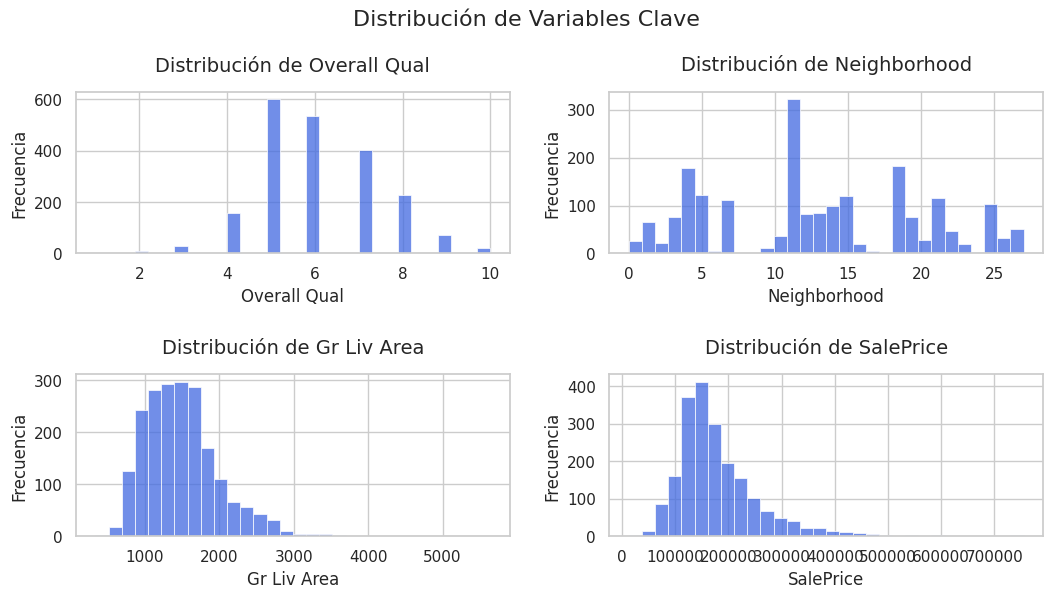

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn (solo el fondo)
sns.set_style("whitegrid")  # Opciones: "white", "dark", "whitegrid", "darkgrid", "ticks"

# Configurar tamaño de los gráficos
plt.figure(figsize=(11, 6))

# Lista de variables a visualizar
variables = list(top_3) + ['SalePrice']

# Crear subplots (2 filas x 2 columnas)
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)

    # Histograma simple sin KDE
    sns.histplot(Xm[var], color='royalblue', bins=30, edgecolor='w', linewidth=0.5)

    # Personalización
    plt.title(f'Distribución de {var}', fontsize=14, pad=15)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

# Ajustar layout y mostrar
plt.tight_layout(pad=2)
plt.suptitle('Distribución de Variables Clave', y=1.02, fontsize=16)
plt.show()

# **Box Plot de SalePrice y sus 3 variables más correlacionadas**

<Figure size 1400x800 with 0 Axes>

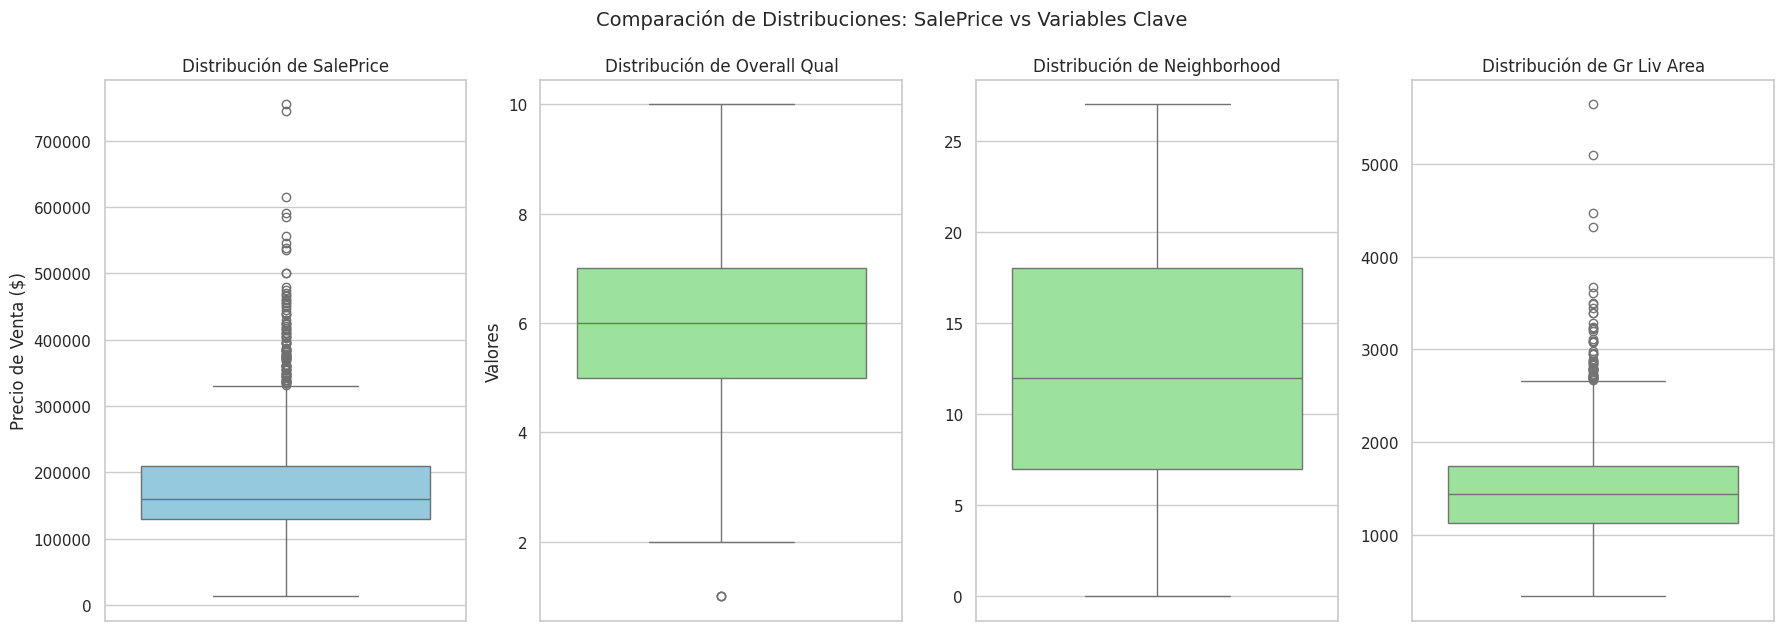

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Crear subplots - 1 fila, 4 columnas (una para cada variable)
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Boxplot para SalePrice
sns.boxplot(y=Xm['SalePrice'], ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de SalePrice')
axes[0].set_ylabel('Precio de Venta ($)')

# Boxplots para las 3 variables más correlacionadas
for i, var in enumerate(top_3, 1):
    sns.boxplot(y=Xm[var], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_ylabel('Valores' if i==1 else '')

plt.tight_layout()
plt.suptitle('Comparación de Distribuciones: SalePrice vs Variables Clave', y=1.05, fontsize=14)
plt.show()

# **Scatter con histogramas de SalePrice y sus 3 variables más correlacionadas**

promt: Genera un gráfico de matriz de dispersión con histogramas para visualizar las relaciones entre 'SalePrice' y sus 3 variables más correlacionadas (obtenidas previamente en Xm). Utiliza pandas.plotting.scatter_matrix con un tamaño de figura de 12x8 para la visualización. Asegúrate de ajustar el diseño para evitar solapamientos con plt.tight_layout() y mostrar el gráfico con plt.show().
plt.show()

<Figure size 1200x800 with 0 Axes>

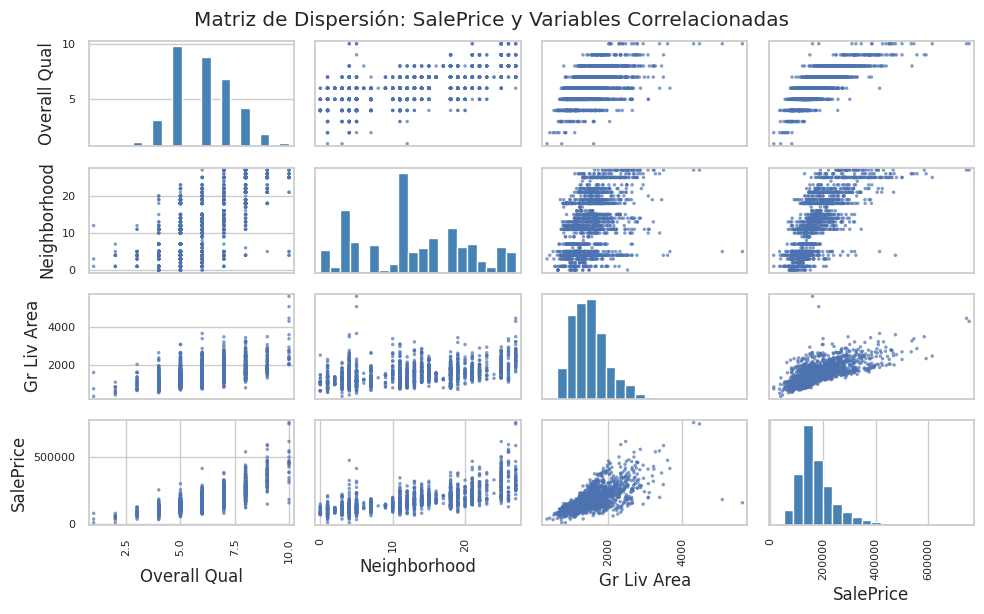

In [89]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear la matriz de dispersión
scatter_matrix(Xm[list(top_3) + ['SalePrice']],
               alpha=0.7,  # Transparencia de los puntos
               diagonal='hist',  # Histogramas en la diagonal
               hist_kwds={'bins': 20, 'color': 'steelblue', 'edgecolor': 'white'},  # Estilo histogramas
               s=25,  # Tamaño de los puntos
               marker='.',  # Forma de los puntos
               grid=True)  # Mostrar grid

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.suptitle('Matriz de Dispersión: SalePrice y Variables Correlacionadas', y=1.02)
plt.show()

#**Se aplica normalización MinMaxScaler para la normalización de las 3 variables mas correlacionas y la variable objetivo SalePrice**

In [90]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Normalización MinMax
scaler = MinMaxScaler()
Xm_pre_sca = pd.DataFrame(scaler.fit_transform(Xm), columns=Xm.columns)

print("Datos normalizados (visualizar las primeras 5 filas):")
display(Xm_pre_sca.head())

Datos normalizados (visualizar las primeras 5 filas):


,Overall Qual,Neighborhood,Gr Liv Area,SalePrice
0,0.444444,0.703704,0.314243,0.178131
1,0.444444,0.740741,0.214582,0.175437
2,0.555556,0.555556,0.224378,0.230003
3,0.777778,0.222222,0.161454,0.201709
4,0.666667,0.592593,0.203466,0.223590


# **Histogramas**

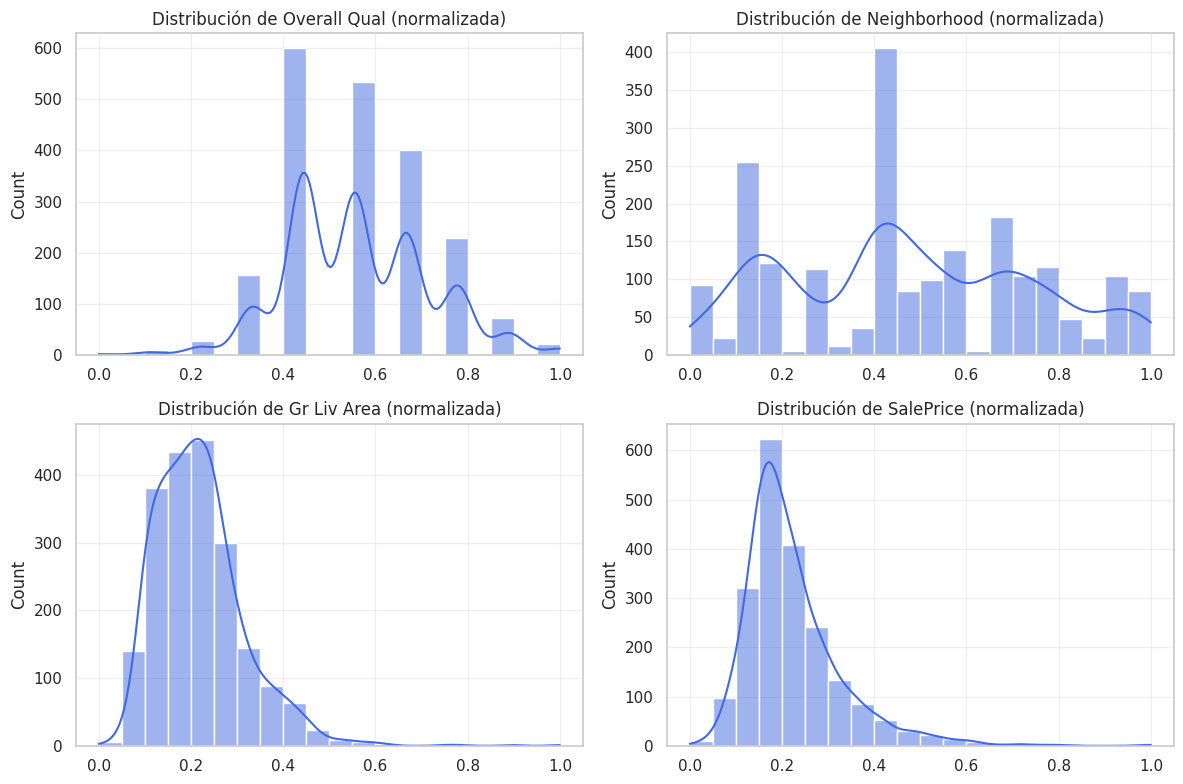

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, col in enumerate(Xm_pre_sca.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(Xm_pre_sca[col], bins=20, color='royalblue', kde=True)
    plt.title(f'Distribución de {col} (normalizada)')
    plt.xlabel('')
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#**Box Plot**

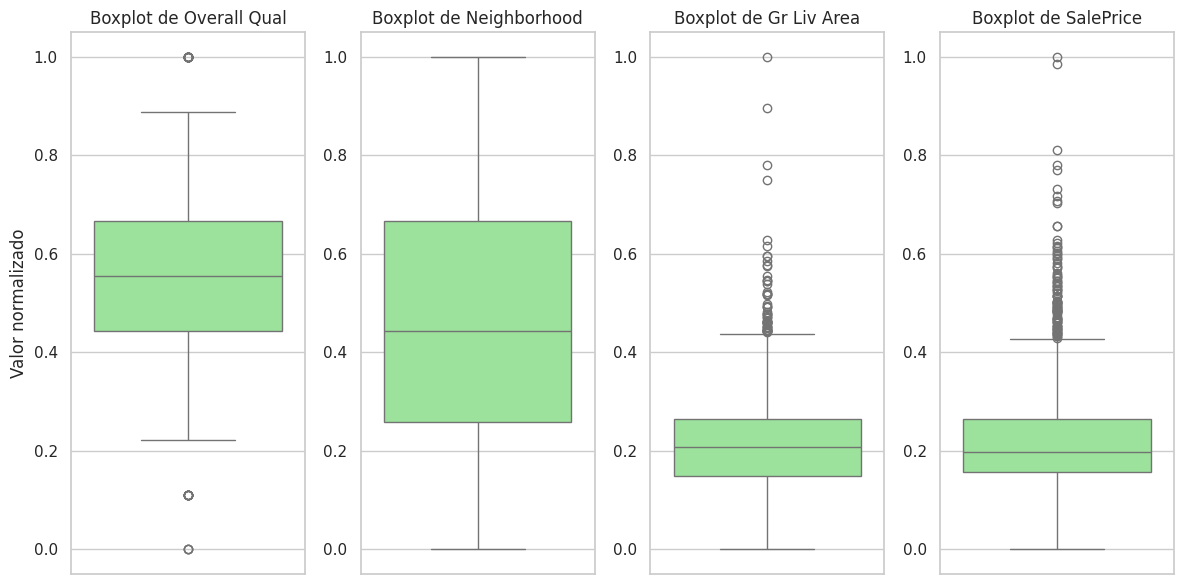

In [92]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(Xm_pre_sca.columns, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=Xm_pre_sca[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valor normalizado' if i == 1 else '')
plt.tight_layout()
plt.show()

#**Scatter con histogramas**

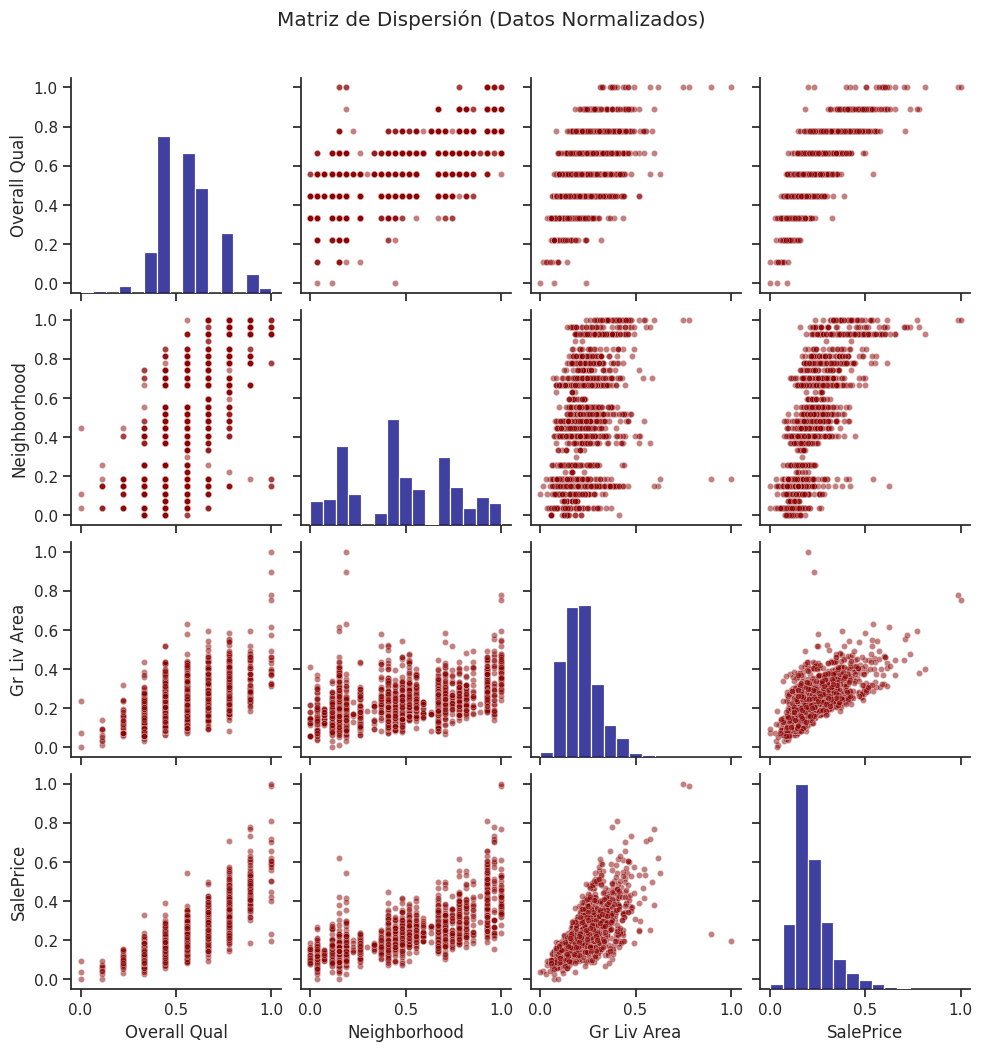

In [93]:
sns.set(style="ticks")
g = sns.pairplot(Xm_pre_sca,
                 diag_kind='hist',
                 plot_kws={'alpha': 0.5, 's': 20, 'color': 'darkred'},
                 diag_kws={'bins': 15, 'color': 'navy'})
g.fig.suptitle('Matriz de Dispersión (Datos Normalizados)', y=1.05)
plt.show()

#**MODELOS**

Para los modelos, eliminamos la variable objetivo del conjunto X_train_encoded (entrenamiento) y X_test_encoded (prueba)

In [94]:
# Celda 1: Eliminar SalePrice de los features (si existe)
X_train_final = X_train_encoded.drop(columns=['SalePrice'], errors='ignore')
X_test_final = X_test_encoded.drop(columns=['SalePrice'], errors='ignore')

# Celda 2: Verificación rápida
print("Dimensiones finales:")
print(f"X_train: {X_train_final.shape} | y_train: {y_train.shape}")
print(f"X_test: {X_test_final.shape} | y_test: {y_test.shape}")

# Celda 3: Mostrar primeras filas (opcional)
print("\nVariables en X_train_final:")
display(X_train_final.head(2))

Dimensiones finales:
X_train: (2051, 63) | y_train: (2051,)
X_test: (879, 63) | y_test: (879,)

Variables en X_train_final:


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition
2210,90.0,4,82.0,6270.0,0,3,2,0,19,5,2,6,5.0,6.0,1949.0,1950.0,1,6,5,0.0,1,3,2,2,2,0,1,284.0,3,0.0,717.0,1001.0,2,0,3,1001.0,1001.0,2002.0,0.0,2.0,0.0,4.0,2.0,1,8.0,7,0.0,2,1949.0,0,3.0,871.0,2,4,2,0.0,0.0,0.0,0.0,8.0,2007.0,5,4
782,20.0,5,65.0,25095.0,2,2,2,2,20,5,3,4,5.0,8.0,1968.0,2003.0,4,4,4,0.0,1,3,2,2,2,3,5,1324.0,3,0.0,113.0,1437.0,4,1,4,1473.0,0.0,1473.0,2.0,1.0,0.0,1.0,1.0,3,5.0,7,2.0,4,1968.0,0,1.0,452.0,2,4,2,0.0,48.0,0.0,60.0,6.0,2009.0,5,5


#**1.Modelo LinearRegresor**

Los pasos que se realizaron son los siguientes:

1. **Validación Cruzada con Pipeline de Regresión Lineal y Evaluación de Métricas**

2. **Evaluación del Modelo en el Conjunto de Prueba**

3. **Grafico de Dispersión: Valores Reales VS Valores Predichos**

MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO (Validación Cruzada)


,Métrica,Media (CV),Desviación Estándar
0,MAE,1.917042e+04,7.115686e+02
1,MSE,1.024441e+09,2.614546e+08
2,R²,8.280808e-01,5.481684e-02
3,MAPE (%),1.174134e+01,8.745636e-01



MÉTRICAS EN CONJUNTO DE PRUEBA


,Métrica,Valor
0,MAE,1.900984e+04
1,MSE,8.937946e+08
2,R²,8.728496e-01
3,MAPE (%),1.085727e+01


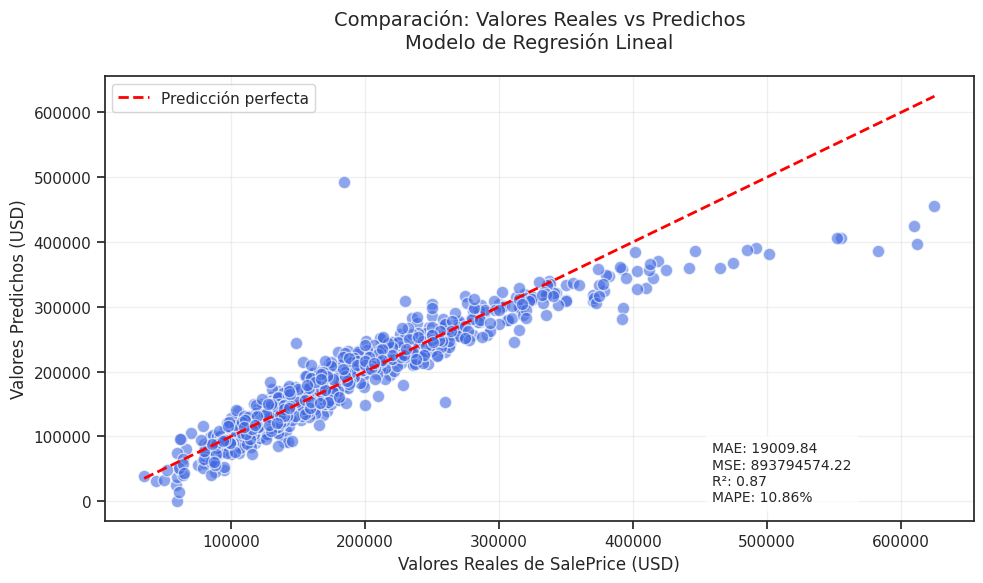

In [95]:
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Función MAPE segura
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100

# Configuración del modelo
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LinearRegression())
])

# 1. Validación Cruzada (Entrenamiento)
print("="*50)
print("MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO (Validación Cruzada)")
print("="*50)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

cv_results = cross_validate(
    pipeline,
    X_train_final,
    y_train,
    cv=cv,
    scoring={
        'MAE': 'neg_mean_absolute_error',
        'MSE': 'neg_mean_squared_error',
        'R2': 'r2',
        'MAPE': mape_scorer
    },
    return_train_score=True
)

# Mostrar métricas de entrenamiento
train_metrics = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'R²', 'MAPE (%)'],
    'Media (CV)': [
        -cv_results['test_MAE'].mean(),
        -cv_results['test_MSE'].mean(),
        cv_results['test_R2'].mean(),
        -cv_results['test_MAPE'].mean()
    ],
    'Desviación Estándar': [
        cv_results['test_MAE'].std(),
        cv_results['test_MSE'].std(),
        cv_results['test_R2'].std(),
        cv_results['test_MAPE'].std()
    ]
})
display(train_metrics)

# 2. Evaluación en Prueba
print("\n" + "="*50)
print("MÉTRICAS EN CONJUNTO DE PRUEBA")
print("="*50)

pipeline.fit(X_train_final, y_train)
y_pred = pipeline.predict(X_test_final)

test_metrics = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'R²', 'MAPE (%)'],
    'Valor': [
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred),
        mean_absolute_percentage_error(y_test, y_pred)
    ]
})
display(test_metrics)

# 3. Gráfico de dispersión con formato profesional
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue', edgecolor='w', s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--', color='red', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales de SalePrice (USD)', fontsize=12)
plt.ylabel('Valores Predichos (USD)', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo de Regresión Lineal',
          fontsize=14, pad=20)

# Cuadro de métricas
metrics_text = (f'MAE: {mean_absolute_error(y_test, y_pred):.2f}\n'
                f'MSE: {mean_squared_error(y_test, y_pred):.2f}\n'
                f'R²: {r2_score(y_test, y_pred):.2f}\n'
                f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.2f}%')
plt.gcf().text(0.72, 0.15, metrics_text, bbox=dict(facecolor='white', alpha=0.8),
               fontsize=10)

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#**2. Modelo Lasso**

El código realiza una optimización de hiperparámetros para un modelo Lasso (regresión lineal con regularización L1) usando tres métodos distintos:

1. Grid Search (búsqueda exhaustiva en una grilla de parámetros).

2. Random Search (búsqueda aleatoria en un espacio de parámetros).

3. Bayesian Optimization (optimización bayesiana con Optuna).

In [96]:
!pip install optuna


Optimización por Grid Search
Mejor alpha (Grid Search): 100.000000
Métricas en entrenamiento:
MSE: 862076379.5692
MAE: 18385.8664
R2: 0.8583
MAPE: 11.0241

Optimización por Random Search


[I 2025-05-26 03:25:27,991] A new study created in memory with name: no-name-5466d318-969a-4962-8fd9-62dc8fa64884


Mejor alpha (Random Search): 65.987111
Métricas en entrenamiento:
MSE: 851920184.8882
MAE: 18260.9650
R2: 0.8600
MAPE: 10.9901

Optimización por Bayesian Optimization (Optuna)


[I 2025-05-26 03:25:33,618] Trial 0 finished with value: 1024133613.0601299 and parameters: {'alpha': 0.017670169402947963}. Best is trial 0 with value: 1024133613.0601299.
[I 2025-05-26 03:25:33,777] Trial 1 finished with value: 983078540.756862 and parameters: {'alpha': 50.61576888752309}. Best is trial 1 with value: 983078540.756862.
[I 2025-05-26 03:25:34,047] Trial 2 finished with value: 1020048050.9958789 and parameters: {'alpha': 2.465832945854912}. Best is trial 1 with value: 983078540.756862.
[I 2025-05-26 03:25:35,643] Trial 3 finished with value: 1023238108.249737 and parameters: {'alpha': 0.39079671568228835}. Best is trial 1 with value: 983078540.756862.
[I 2025-05-26 03:25:40,398] Trial 4 finished with value: 1024184222.7890806 and parameters: {'alpha': 0.0008632008168602544}. Best is trial 1 with value: 983078540.756862.
[I 2025-05-26 03:25:45,847] Trial 5 finished with value: 1024184223.6561276 and parameters: {'alpha': 0.0008629132190071859}. Best is trial 1 with value

Mejor alpha (Optuna): 100.000000
Métricas en entrenamiento:
MSE: 862076379.5692
MAE: 18385.8664
R2: 0.8583
MAPE: 11.0241

Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)
Métricas en prueba:
MSE: 920338287.9222
MAE: 19351.0936
R2: 0.8691
MAPE: 10.9702


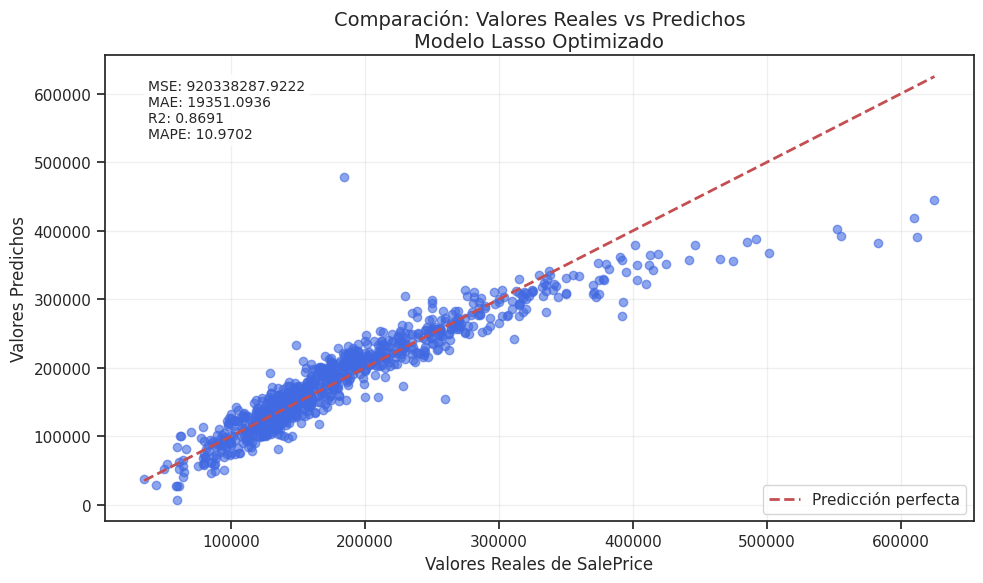

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import loguniform
import optuna
from optuna.samplers import GPSampler

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas
def calcular_metricas(y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100
    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', Lasso(max_iter=10000))  # Aumentamos iteraciones para convergencia
])

# =============================================
# Método 1: Grid Search
# =============================================
print("\n" + "="*50)
print("Optimización por Grid Search")
print("="*50)

param_grid = {'model__alpha': np.logspace(-4, 2, 20)}
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train_final, y_train)

# Resultados Grid Search
best_alpha_grid = grid_search.best_params_['model__alpha']
y_pred_grid = grid_search.predict(X_train_final)
metrics_grid = calcular_metricas(y_train, y_pred_grid)

print(f"Mejor alpha (Grid Search): {best_alpha_grid:.6f}")
print("Métricas en entrenamiento:")
for metrica, valor in metrics_grid.items():
    print(f"{metrica}: {valor:.4f}")

# =============================================
# Método 2: Random Search
# =============================================
print("\n" + "="*50)
print("Optimización por Random Search")
print("="*50)

param_dist = {'model__alpha': loguniform(1e-4, 1e2)}
random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train_final, y_train)

# Resultados Random Search
best_alpha_random = random_search.best_params_['model__alpha']
y_pred_random = random_search.predict(X_train_final)
metrics_random = calcular_metricas(y_train, y_pred_random)

print(f"Mejor alpha (Random Search): {best_alpha_random:.6f}")
print("Métricas en entrenamiento:")
for metrica, valor in metrics_random.items():
    print(f"{metrica}: {valor:.4f}")

# =============================================
# Método 3: Bayesian Optimization con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización por Bayesian Optimization (Optuna)")
print("="*50)

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)

    model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', Lasso(alpha=alpha, max_iter=10000))
    ])

    # Usamos validación cruzada manual
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return np.mean(mse_scores)

# Configurar estudio Optuna
sampler = GPSampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=20)

# Resultados Optuna
best_alpha_optuna = study.best_params['alpha']
pipeline.set_params(model__alpha=best_alpha_optuna)
pipeline.fit(X_train_final, y_train)
y_pred_optuna = pipeline.predict(X_train_final)
metrics_optuna = calcular_metricas(y_train, y_pred_optuna)

print(f"Mejor alpha (Optuna): {best_alpha_optuna:.6f}")
print("Métricas en entrenamiento:")
for metrica, valor in metrics_optuna.items():
    print(f"{metrica}: {valor:.4f}")

# Visualización historial Optuna (opcional)
#optuna.visualization.plot_optimization_history(study).show()

# =============================================
# Evaluación final con mejor modelo (Optuna)
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)")
print("="*50)

# Entrenar modelo final con mejor alpha
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', Lasso(alpha=best_alpha_optuna, max_iter=10000))
])
best_model.fit(X_train_final, y_train)

# Predecir en test
y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("Métricas en prueba:")
for metrica, valor in test_metrics.items():
    print(f"{metrica}: {valor:.4f}")

# =============================================
# Gráfico de dispersión
# =============================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales de SalePrice', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo Lasso Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#**3 Modelo ElasticNet**

El código realiza una optimización de hiperparámetros para un modelo ElasticNet (combinación de regularización L1 y L2) usando tres métodos:

1. Grid Search (búsqueda exhaustiva en una grilla de parámetros).

2. Random Search (búsqueda aleatoria en un espacio de parámetros).

3. Bayesian Optimization (optimización inteligente con Optuna).


Optimización por Grid Search
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros (Grid Search):
alpha: 0.046416
l1_ratio: 0.90

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,8.785322e+08,18625.488998,0.855642,11.080053



Optimización por Random Search
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros (Random Search):
alpha: 0.005661
l1_ratio: 0.39

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,8.671603e+08,18513.594226,0.85751,11.066003


[I 2025-05-26 03:14:57,913] A new study created in memory with name: no-name-5153dfdf-2849-463a-a41e-fd659cd64d9b
[I 2025-05-26 03:14:58,067] Trial 0 finished with value: 976176148.0544745 and parameters: {'alpha': 0.017670169402947963, 'l1_ratio': 0.8605714451279329}. Best is trial 0 with value: 976176148.0544745.



Optimización por Bayesian Optimization (Optuna)


[I 2025-05-26 03:14:58,156] Trial 1 finished with value: 3601840427.930922 and parameters: {'alpha': 2.465832945854912, 'l1_ratio': 0.5789267873576293}. Best is trial 0 with value: 976176148.0544745.
[I 2025-05-26 03:14:58,341] Trial 2 finished with value: 997354972.2883167 and parameters: {'alpha': 0.0008632008168602544, 'l1_ratio': 0.22479561626896213}. Best is trial 0 with value: 976176148.0544745.
[I 2025-05-26 03:14:58,973] Trial 3 finished with value: 1019223448.1331508 and parameters: {'alpha': 0.00022310108018679258, 'l1_ratio': 0.7929409166199481}. Best is trial 0 with value: 976176148.0544745.
[I 2025-05-26 03:14:59,067] Trial 4 finished with value: 1700451096.3044388 and parameters: {'alpha': 0.4042872735027334, 'l1_ratio': 0.6664580622368363}. Best is trial 0 with value: 976176148.0544745.
[I 2025-05-26 03:15:01,025] Trial 5 finished with value: 1021633336.2297008 and parameters: {'alpha': 0.00013289448722869195, 'l1_ratio': 0.8759278817295955}. Best is trial 0 with value: 


Mejores parámetros (Optuna):
alpha: 0.034158
l1_ratio: 0.90

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,8.669782e+08,18511.781649,0.85754,11.065792



Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)

Métricas en prueba:


,MSE,MAE,R2,MAPE
0,9.415393e+08,19792.181087,0.866057,11.064269


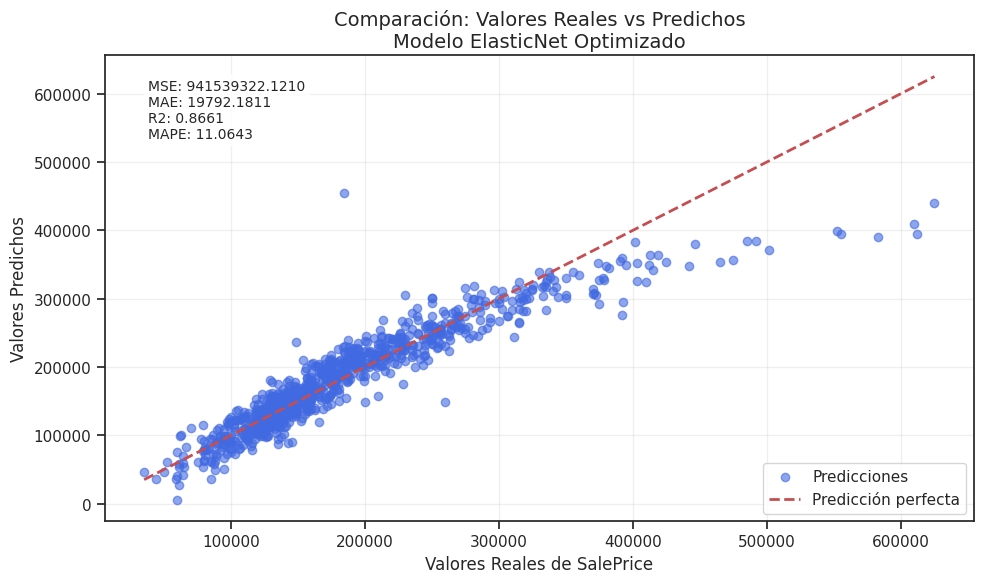

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import pandas as pd
from sklearn.base import clone

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas (con protección contra divisiones por cero)
def calcular_metricas(y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    mape = np.mean(np.abs((y_real - y_pred) / np.maximum(np.abs(y_real), 1e-10))) * 100  # Evita division por cero
    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', ElasticNet(max_iter=10000, random_state=42))  # Aumentamos iteraciones para convergencia
])

# =============================================
# Método 1: Grid Search
# =============================================
print("\n" + "="*50)
print("Optimización por Grid Search")
print("="*50)

param_grid = {
    'model__alpha': np.logspace(-4, 2, 10),
    'model__l1_ratio': np.linspace(0.1, 0.9, 5)
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_final, y_train)

# Resultados Grid Search
best_params_grid = grid_search.best_params_
y_pred_grid = grid_search.predict(X_train_final)
metrics_grid = calcular_metricas(y_train, y_pred_grid)

print("\nMejores parámetros (Grid Search):")
print(f"alpha: {best_params_grid['model__alpha']:.6f}")
print(f"l1_ratio: {best_params_grid['model__l1_ratio']:.2f}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_grid]))

# =============================================
# Método 2: Random Search
# =============================================
print("\n" + "="*50)
print("Optimización por Random Search")
print("="*50)

param_dist = {
    'model__alpha': loguniform(1e-4, 1e2),
    'model__l1_ratio': uniform(0.1, 0.8)  # 0.1 a 0.9
}

random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train_final, y_train)

# Resultados Random Search
best_params_random = random_search.best_params_
y_pred_random = random_search.predict(X_train_final)
metrics_random = calcular_metricas(y_train, y_pred_random)

print("\nMejores parámetros (Random Search):")
print(f"alpha: {best_params_random['model__alpha']:.6f}")
print(f"l1_ratio: {best_params_random['model__l1_ratio']:.2f}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_random]))

# =============================================
# Método 3: Bayesian Optimization con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización por Bayesian Optimization (Optuna)")
print("="*50)

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.1, 0.9)

    model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, random_state=42))
    ])

    # Usamos validación cruzada manual
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return np.mean(mse_scores)

# Configurar estudio Optuna
sampler = GPSampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=20)

# Resultados Optuna
best_params_optuna = study.best_params
pipeline.set_params(
    model__alpha=best_params_optuna['alpha'],
    model__l1_ratio=best_params_optuna['l1_ratio']
)
pipeline.fit(X_train_final, y_train)
y_pred_optuna = pipeline.predict(X_train_final)
metrics_optuna = calcular_metricas(y_train, y_pred_optuna)

print("\nMejores parámetros (Optuna):")
print(f"alpha: {best_params_optuna['alpha']:.6f}")
print(f"l1_ratio: {best_params_optuna['l1_ratio']:.2f}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_optuna]))

# Visualizaciones Optuna (opcional)
# Eliminar o comentar estas líneas para quitar las gráficas:
# fig1 = optuna.visualization.plot_optimization_history(study)
# fig2 = optuna.visualization.plot_param_importances(study)
# fig1.show()
# fig2.show()

# =============================================
# Evaluación final con mejor modelo (Optuna)
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)")
print("="*50)

# Entrenar modelo final con mejores parámetros
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', ElasticNet(
        alpha=best_params_optuna['alpha'],
        l1_ratio=best_params_optuna['l1_ratio'],
        max_iter=10000,
        random_state=42
    ))
])
best_model.fit(X_train_final, y_train)

# Predecir en test
y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("\nMétricas en prueba:")
display(pd.DataFrame([test_metrics]))

# =============================================
# Gráfico de dispersión
# =============================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales de SalePrice', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo ElasticNet Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#**4 Modelo KernelRidge**


Optimización por Grid Search
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Mejores parámetros (Grid Search):
alpha: 0.046416
gamma: 0.1000

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,1.801492e+08,9166.812363,0.970398,5.319983



Optimización por Random Search
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros (Random Search):
alpha: 0.358499
gamma: 0.1465

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,3.554498e+08,12199.248218,0.941593,7.036185


[I 2025-05-26 03:37:47,045] A new study created in memory with name: no-name-3a9d202b-7046-453b-81f7-d36a4b01dab0



Optimización por Bayesian Optimization (Optuna)


[I 2025-05-26 03:37:48,470] Trial 0 finished with value: 3449156878.6615496 and parameters: {'alpha': 0.017670169402947963, 'gamma': 0.9556428757689246}. Best is trial 0 with value: 3449156878.6615496.
[I 2025-05-26 03:37:49,903] Trial 1 finished with value: 3057771236.700388 and parameters: {'alpha': 2.465832945854912, 'gamma': 0.6387926357773329}. Best is trial 1 with value: 3057771236.700388.
[I 2025-05-26 03:37:51,269] Trial 2 finished with value: 835340098.9483314 and parameters: {'alpha': 0.0008632008168602544, 'gamma': 0.2403950683025824}. Best is trial 2 with value: 835340098.9483314.
[I 2025-05-26 03:37:52,766] Trial 3 finished with value: 2983830580.50598 and parameters: {'alpha': 0.00022310108018679258, 'gamma': 0.8795585311974417}. Best is trial 2 with value: 835340098.9483314.
[I 2025-05-26 03:37:54,388] Trial 4 finished with value: 2604166964.524404 and parameters: {'alpha': 0.4042872735027334, 'gamma': 0.737265320016441}. Best is trial 2 with value: 835340098.9483314.
[I


Mejores parámetros (Optuna):
alpha: 0.055530
gamma: 0.1000

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,1.960325e+08,9514.728594,0.967788,5.523982



Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)

Métricas en prueba:


,MSE,MAE,R2,MAPE
0,5.154780e+08,14070.128556,0.926669,8.027819


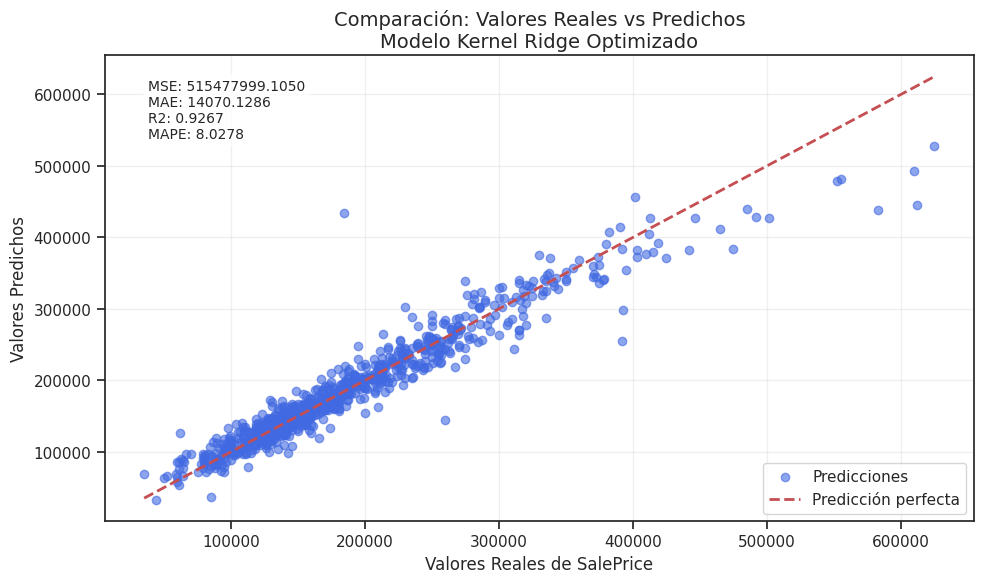

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import pandas as pd
from sklearn.base import clone

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas (con protección contra divisiones por cero)
def calcular_metricas(y_real, y_pred):
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    # MAPE con protección contra divisiones por cero
    mask = y_real != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_real[mask] - y_pred[mask]) / y_real[mask])) * 100
    else:
        mape = np.nan

    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', KernelRidge(kernel='rbf'))
])

# =============================================
# Método 1: Grid Search
# =============================================
print("\n" + "="*50)
print("Optimización por Grid Search")
print("="*50)

param_grid = {
    'model__alpha': np.logspace(-4, 2, 10),
    'model__gamma': np.linspace(0.1, 1.0, 10)
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_final, y_train)

# Resultados Grid Search
best_params_grid = grid_search.best_params_
y_pred_grid = grid_search.predict(X_train_final)
metrics_grid = calcular_metricas(y_train, y_pred_grid)

print("\nMejores parámetros (Grid Search):")
print(f"alpha: {best_params_grid['model__alpha']:.6f}")
print(f"gamma: {best_params_grid['model__gamma']:.4f}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_grid]))

# =============================================
# Método 2: Random Search
# =============================================
print("\n" + "="*50)
print("Optimización por Random Search")
print("="*50)

param_dist = {
    'model__alpha': loguniform(1e-4, 1e2),
    'model__gamma': uniform(0.1, 1.0)
}

random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train_final, y_train)

# Resultados Random Search
best_params_random = random_search.best_params_
y_pred_random = random_search.predict(X_train_final)
metrics_random = calcular_metricas(y_train, y_pred_random)

print("\nMejores parámetros (Random Search):")
print(f"alpha: {best_params_random['model__alpha']:.6f}")
print(f"gamma: {best_params_random['model__gamma']:.4f}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_random]))

# =============================================
# Método 3: Bayesian Optimization con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización por Bayesian Optimization (Optuna)")
print("="*50)

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e2, log=True)
    gamma = trial.suggest_float('gamma', 0.1, 1.0)

    model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma))
    ])

    # Usamos validación cruzada manual para mejor estimación
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return np.mean(mse_scores)

# Configurar estudio Optuna
sampler = GPSampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=20)

# Resultados Optuna
best_params_optuna = study.best_params
pipeline.set_params(
    model__alpha=best_params_optuna['alpha'],
    model__gamma=best_params_optuna['gamma']
)
pipeline.fit(X_train_final, y_train)
y_pred_optuna = pipeline.predict(X_train_final)
metrics_optuna = calcular_metricas(y_train, y_pred_optuna)

print("\nMejores parámetros (Optuna):")
print(f"alpha: {best_params_optuna['alpha']:.6f}")
print(f"gamma: {best_params_optuna['gamma']:.4f}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_optuna]))

# Visualizaciones Optuna (opcional)
#fig1 = optuna.visualization.plot_optimization_history(study)
#fig2 = optuna.visualization.plot_param_importances(study)
#fig1.show()
#fig2.show()

# =============================================
# Evaluación final con mejor modelo (Optuna)
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)")
print("="*50)

# Entrenar modelo final con mejores parámetros
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', KernelRidge(
        kernel='rbf',
        alpha=best_params_optuna['alpha'],
        gamma=best_params_optuna['gamma']
    ))
])
best_model.fit(X_train_final, y_train)

# Predecir en test
y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("\nMétricas en prueba:")
display(pd.DataFrame([test_metrics]))

# =============================================
# Gráfico de dispersión
# =============================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales de SalePrice', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo Kernel Ridge Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#**5. Modelo SGDRegressor**


Optimización por Grid Search
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Mejores parámetros (Grid Search):
model__alpha: 0.001
model__eta0: 0.05
model__learning_rate: adaptive
model__penalty: l2

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,8.505074e+08,18559.435426,0.860247,11.232139



Optimización por Random Search
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros (Random Search):
model__alpha: 0.00019069966103000456
model__eta0: 0.08851759613930137
model__l1_ratio: 0.19967378215835974
model__learning_rate: adaptive
model__penalty: l2

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,8.513465e+08,18818.558256,0.860109,11.527949


[I 2025-05-26 03:39:52,333] A new study created in memory with name: no-name-f13aa6f7-5ab7-4983-a496-c9a32da503dd
[I 2025-05-26 03:39:52,484] Trial 0 finished with value: 7556641248.886419 and parameters: {'alpha': 7.459343285726558e-05, 'penalty': 'l2', 'learning_rate': 'constant', 'eta0': 0.08795585311974417}. Best is trial 0 with value: 7556641248.886419.



Optimización por Bayesian Optimization (Optuna)


[I 2025-05-26 03:39:52,669] Trial 1 finished with value: 1131979744.725865 and parameters: {'alpha': 0.0010129197956845735, 'penalty': 'elasticnet', 'learning_rate': 'constant', 'eta0': 0.026506405886809047, 'l1_ratio': 0.3042422429595377}. Best is trial 1 with value: 1131979744.725865.
[I 2025-05-26 03:39:53,133] Trial 2 finished with value: 1009806772.8592432 and parameters: {'alpha': 0.0004205156450913873, 'penalty': 'elasticnet', 'learning_rate': 'adaptive', 'eta0': 0.05104629857953324, 'l1_ratio': 0.7851759613930136}. Best is trial 2 with value: 1009806772.8592432.
[I 2025-05-26 03:39:53,276] Trial 3 finished with value: 2.3238453572427216e+16 and parameters: {'alpha': 9.962513222055122e-06, 'penalty': 'l1', 'learning_rate': 'constant', 'eta0': 0.0953996983528}. Best is trial 2 with value: 1009806772.8592432.
[I 2025-05-26 03:39:53,419] Trial 4 finished with value: 2102488989.6782823 and parameters: {'alpha': 0.0673224892077534, 'penalty': 'l2', 'learning_rate': 'constant', 'eta0'


Mejores parámetros (Optuna):
alpha: 0.1
penalty: l1
learning_rate: adaptive
eta0: 0.01

Métricas en entrenamiento:


,MSE,MAE,R2,MAPE
0,8.605635e+08,18801.43835,0.858594,11.399266



Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)

Métricas en prueba:


,MSE,MAE,R2,MAPE
0,9.270182e+08,19879.352262,0.868123,11.356056


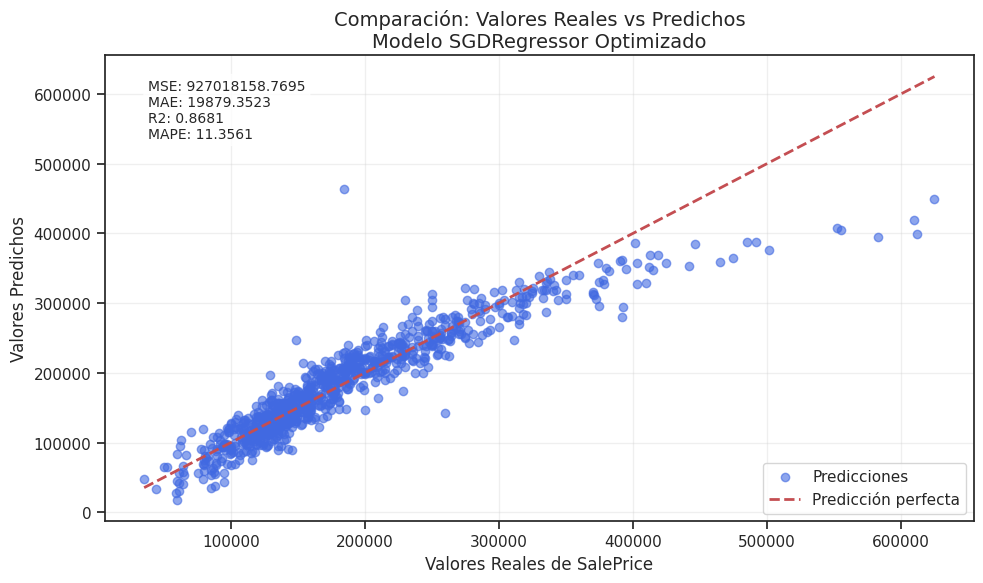

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import loguniform, uniform
import optuna
from optuna.samplers import GPSampler
import pandas as pd

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas (con protección contra divisiones por cero)
def calcular_metricas(y_real, y_pred):
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    # MAPE con protección contra divisiones por cero
    mask = y_real != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_real[mask] - y_pred[mask]) / y_real[mask])) * 100
    else:
        mape = np.nan

    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SGDRegressor(
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    ))
])

# =============================================
# Método 1: Grid Search
# =============================================
print("\n" + "="*50)
print("Optimización por Grid Search")
print("="*50)

param_grid = {
    'model__alpha': np.logspace(-6, -1, 6),
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'model__eta0': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_final, y_train)

# Resultados Grid Search
best_params_grid = grid_search.best_params_
y_pred_grid = grid_search.predict(X_train_final)
metrics_grid = calcular_metricas(y_train, y_pred_grid)

print("\nMejores parámetros (Grid Search):")
for param, value in best_params_grid.items():
    print(f"{param}: {value}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_grid]))

# =============================================
# Método 2: Random Search
# =============================================
print("\n" + "="*50)
print("Optimización por Random Search")
print("="*50)

param_dist = {
    'model__alpha': loguniform(1e-6, 1e-1),
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'model__eta0': uniform(0.01, 0.1),
    'model__l1_ratio': uniform(0, 1)  # Solo usado con penalty='elasticnet'
}

random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train_final, y_train)

# Resultados Random Search
best_params_random = random_search.best_params_
y_pred_random = random_search.predict(X_train_final)
metrics_random = calcular_metricas(y_train, y_pred_random)

print("\nMejores parámetros (Random Search):")
for param, value in best_params_random.items():
    print(f"{param}: {value}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_random]))

# =============================================
# Método 3: Bayesian Optimization con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización por Bayesian Optimization (Optuna)")
print("="*50)

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-6, 1e-1, log=True)
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet'])
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    eta0 = trial.suggest_float('eta0', 0.01, 0.1)

    params = {
        'model__alpha': alpha,
        'model__penalty': penalty,
        'model__learning_rate': learning_rate,
        'model__eta0': eta0
    }

    if penalty == 'elasticnet':
        params['model__l1_ratio'] = trial.suggest_float('l1_ratio', 0, 1)

    current_pipeline = clone(pipeline)
    current_pipeline.set_params(**params)

    # Usamos validación cruzada manual para mejor estimación
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        current_pipeline.fit(X_train_cv, y_train_cv)
        y_pred = current_pipeline.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return np.mean(mse_scores)

# Configurar estudio Optuna
sampler = GPSampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=20)

# Resultados Optuna
best_params_optuna = study.best_params
optuna_params = {
    'model__alpha': best_params_optuna['alpha'],
    'model__penalty': best_params_optuna['penalty'],
    'model__learning_rate': best_params_optuna['learning_rate'],
    'model__eta0': best_params_optuna['eta0']
}
if best_params_optuna['penalty'] == 'elasticnet':
    optuna_params['model__l1_ratio'] = best_params_optuna['l1_ratio']

pipeline.set_params(**optuna_params)
pipeline.fit(X_train_final, y_train)
y_pred_optuna = pipeline.predict(X_train_final)
metrics_optuna = calcular_metricas(y_train, y_pred_optuna)

print("\nMejores parámetros (Optuna):")
for param, value in best_params_optuna.items():
    print(f"{param}: {value}")
print("\nMétricas en entrenamiento:")
display(pd.DataFrame([metrics_optuna]))

# Visualizaciones Optuna (opcional)
#fig1 = optuna.visualization.plot_optimization_history(study)
#fig2 = optuna.visualization.plot_param_importances(study)
#fig1.show()
#fig2.show()

# =============================================
# Evaluación final con mejor modelo (Optuna)
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba (Mejor Modelo - Optuna)")
print("="*50)

# Entrenar modelo final con mejores parámetros
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SGDRegressor(
        alpha=best_params_optuna['alpha'],
        penalty=best_params_optuna['penalty'],
        learning_rate=best_params_optuna['learning_rate'],
        eta0=best_params_optuna['eta0'],
        l1_ratio=best_params_optuna.get('l1_ratio', 0.5),  # Default si no es elasticnet
        max_iter=1000,
        tol=1e-3,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    ))
])
best_model.fit(X_train_final, y_train)

# Predecir en test
y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("\nMétricas en prueba:")
display(pd.DataFrame([test_metrics]))

# =============================================
# Gráfico de dispersión
# =============================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales de SalePrice', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo SGDRegressor Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#**6. Modelo BayesianRidge**

[I 2025-05-26 03:43:20,358] A new study created in memory with name: no-name-0d591b1a-0437-4ee3-9b46-7f6e63e17dec



Optimización de Hiperparámetros con Optuna


[I 2025-05-26 03:43:20,620] Trial 0 finished with value: 1002884702.7940719 and parameters: {'alpha_1': 3.148911647956857e-07, 'alpha_2': 6.351221010640702e-05, 'lambda_1': 8.471801418819967e-06, 'lambda_2': 2.4810409748678096e-06}. Best is trial 0 with value: 1002884702.7940719.
[I 2025-05-26 03:43:21,052] Trial 1 finished with value: 1002884706.7761068 and parameters: {'alpha_1': 4.207988669606625e-08, 'alpha_2': 4.207053950287927e-08, 'lambda_1': 1.7073967431528076e-08, 'lambda_2': 2.915443189153754e-05}. Best is trial 0 with value: 1002884702.7940719.
[I 2025-05-26 03:43:21,406] Trial 2 finished with value: 1002884706.8219992 and parameters: {'alpha_1': 2.5378155082656626e-06, 'alpha_2': 6.7965780907581515e-06, 'lambda_1': 1.2087541473056917e-08, 'lambda_2': 7.579479953348007e-05}. Best is trial 0 with value: 1002884702.7940719.
[I 2025-05-26 03:43:21,970] Trial 3 finished with value: 1002884707.1302532 and parameters: {'alpha_1': 2.1368329072358724e-05, 'alpha_2': 7.06897495062459


Mejores parámetros encontrados:
alpha_1: 1.00e-08
alpha_2: 6.89e-06
lambda_1: 1.00e-04
lambda_2: 1.00e-04

Evaluación en Conjunto de Entrenamiento

Métricas en entrenamiento (CV):


,MSE,MAE,R2,MAPE
0,1.002708e+09,19053.756516,0.835237,11.619301



Evaluación en Conjunto de Prueba

Métricas en prueba:


,MSE,MAE,R2,MAPE
0,8.980901e+08,19161.25733,0.872239,10.895612


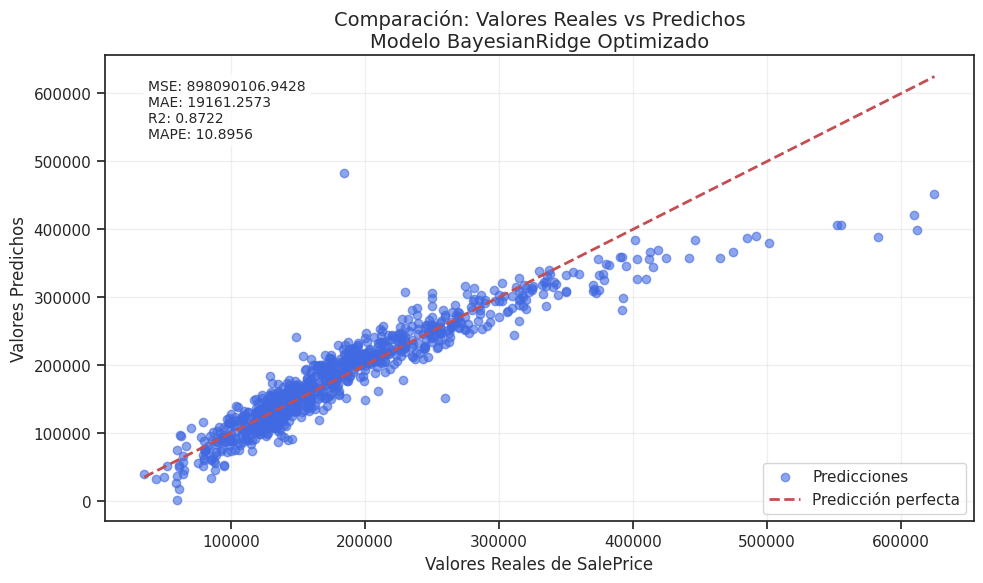


Visualizaciones de Optimización


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna
from optuna.samplers import GPSampler
import pandas as pd

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas (con protección contra divisiones por cero)
def calcular_metricas(y_real, y_pred):
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    # MAPE con protección contra divisiones por cero
    mask = y_real != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_real[mask] - y_pred[mask]) / y_real[mask])) * 100
    else:
        mape = np.nan

    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', BayesianRidge())
])

# =============================================
# Optimización con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización de Hiperparámetros con Optuna")
print("="*50)

def objective(trial):
    alpha_1 = trial.suggest_float('alpha_1', 1e-8, 1e-4, log=True)
    alpha_2 = trial.suggest_float('alpha_2', 1e-8, 1e-4, log=True)
    lambda_1 = trial.suggest_float('lambda_1', 1e-8, 1e-4, log=True)
    lambda_2 = trial.suggest_float('lambda_2', 1e-8, 1e-4, log=True)

    model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', BayesianRidge(
            alpha_1=alpha_1,
            alpha_2=alpha_2,
            lambda_1=lambda_1,
            lambda_2=lambda_2,
            compute_score=True
        ))
    ])

    # Usamos validación cruzada manual para mejor estimación
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return np.mean(mse_scores)

# Configurar estudio Optuna
sampler = GPSampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials=20)

# Resultados Optuna
best_params = study.best_params
print("\nMejores parámetros encontrados:")
for param, value in best_params.items():
    print(f"{param}: {value:.2e}")

# Configurar modelo con mejores parámetros
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', BayesianRidge(
        alpha_1=best_params['alpha_1'],
        alpha_2=best_params['alpha_2'],
        lambda_1=best_params['lambda_1'],
        lambda_2=best_params['lambda_2'],
        compute_score=True
    ))
])

# =============================================
# Evaluación en entrenamiento
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Entrenamiento")
print("="*50)

# Predicciones con validación cruzada
y_pred_train = cross_val_predict(best_model, X_train_final, y_train, cv=cv)
train_metrics = calcular_metricas(y_train, y_pred_train)

print("\nMétricas en entrenamiento (CV):")
display(pd.DataFrame([train_metrics]))

# Entrenar modelo final con todos los datos
best_model.fit(X_train_final, y_train)

# =============================================
# Evaluación en prueba
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba")
print("="*50)

y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("\nMétricas en prueba:")
display(pd.DataFrame([test_metrics]))

# =============================================
# Gráfico de dispersión
# =============================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales de SalePrice', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo BayesianRidge Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================
# Visualizaciones Optuna (Opcional)
# =============================================
print("\n" + "="*50)
print("Visualizaciones de Optimización")
print("="*50)

#fig1 = optuna.visualization.plot_optimization_history(study)
#fig2 = optuna.visualization.plot_param_importances(study)
#fig1.show()
#fig2.show()

#**7 Gaussian Proccess Regressor**

[I 2025-05-26 03:44:09,967] A new study created in memory with name: no-name-b496cc58-573c-4d28-83ac-1c426d188009



Optimización de Hiperparámetros con Optuna


[I 2025-05-26 03:44:16,772] Trial 0 finished with value: 1350872073.046634 and parameters: {'alpha': 0.0002866621584429835, 'normalize_y': False, 'copy_X_train': True}. Best is trial 0 with value: 1350872073.046634.
[I 2025-05-26 03:44:22,886] Trial 1 finished with value: 852815265.7903281 and parameters: {'alpha': 0.005217702459626699, 'normalize_y': True, 'copy_X_train': False}. Best is trial 1 with value: 852815265.7903281.
[I 2025-05-26 03:44:26,114] Trial 2 finished with value: 854593126.8085754 and parameters: {'alpha': 0.003836352048887298, 'normalize_y': True, 'copy_X_train': True}. Best is trial 1 with value: 852815265.7903281.
[I 2025-05-26 03:44:29,775] Trial 3 finished with value: 1343967374.6519084 and parameters: {'alpha': 0.00974380856551478, 'normalize_y': False, 'copy_X_train': False}. Best is trial 1 with value: 852815265.7903281.
[I 2025-05-26 03:44:34,546] Trial 4 finished with value: 1351039512.195749 and parameters: {'alpha': 0.00016727549920274757, 'normalize_y':


Mejores parámetros encontrados:
alpha: 4.74e-02
normalize_y: 1.00e+00
copy_X_train: 0.00e+00

Evaluación en Conjunto de Entrenamiento

Métricas en entrenamiento (CV):


,MSE,MAE,R2,MAPE
0,8.373922e+08,17129.562025,0.862402,10.812267



Evaluación en Conjunto de Prueba

Métricas en prueba:


,MSE,MAE,R2,MAPE
0,6.470790e+08,15957.638804,0.907947,9.581729


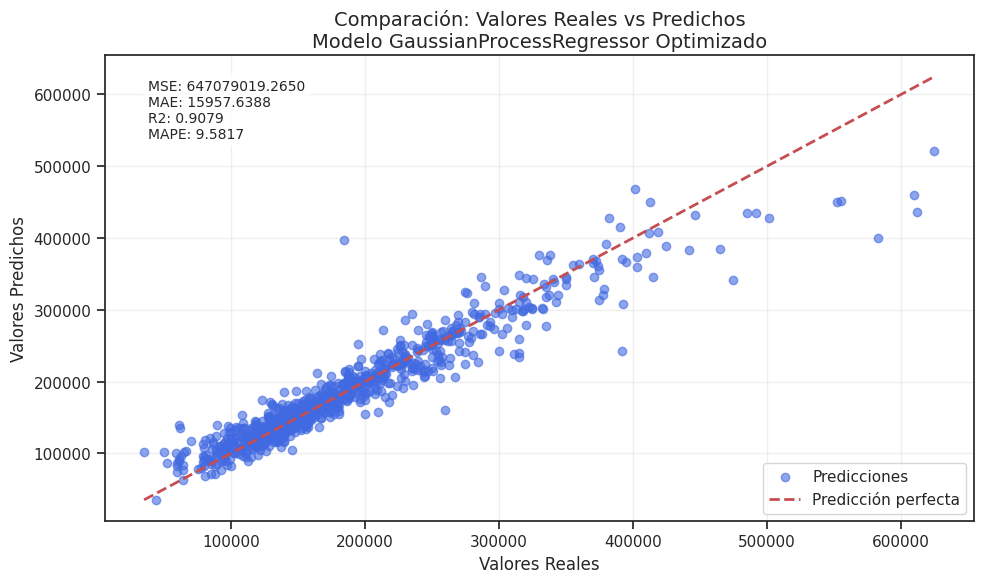


Visualizaciones de Optimización


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import optuna
import warnings
warnings.filterwarnings('ignore')

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas
def calcular_metricas(y_real, y_pred):
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    # MAPE con protección contra divisiones por cero
    mask = y_real != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_real[mask] - y_pred[mask]) / y_real[mask])) * 100
    else:
        mape = np.nan

    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', GaussianProcessRegressor(random_state=42))
])

# =============================================
# Optimización con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización de Hiperparámetros con Optuna")
print("="*50)

bayes_results = []

def objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 1e-1, log=True)
    normalize_y = trial.suggest_categorical('normalize_y', [True, False])
    copy_X_train = trial.suggest_categorical('copy_X_train', [True, False])

    model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', GaussianProcessRegressor(
            alpha=alpha,
            normalize_y=normalize_y,
            copy_X_train=copy_X_train,
            random_state=42
        ))
    ])

    # Validación cruzada manual
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    # Almacenar resultados para análisis posterior
    bayes_results.append({
        'alpha': alpha,
        'normalize_y': normalize_y,
        'copy_X_train': copy_X_train,
        'MSE': np.mean(mse_scores)
    })

    return np.mean(mse_scores)

# Configurar estudio Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Resultados Optuna
best_params = study.best_params
print("\nMejores parámetros encontrados:")
for param, value in best_params.items():
    print(f"{param}: {value:.2e}")

# Configurar modelo con mejores parámetros
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', GaussianProcessRegressor(
        alpha=best_params['alpha'],
        normalize_y=best_params['normalize_y'],
        copy_X_train=best_params['copy_X_train'],
        random_state=42
    ))
])

# =============================================
# Evaluación en entrenamiento
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Entrenamiento")
print("="*50)

# Predicciones con validación cruzada
y_pred_train = cross_val_predict(best_model, X_train_final, y_train, cv=cv)
train_metrics = calcular_metricas(y_train, y_pred_train)

print("\nMétricas en entrenamiento (CV):")
display(pd.DataFrame([train_metrics]))

# Entrenar modelo final con todos los datos
best_model.fit(X_train_final, y_train)

# =============================================
# Evaluación en prueba
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba")
print("="*50)

y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("\nMétricas en prueba:")
display(pd.DataFrame([test_metrics]))

# ==================================
# Gráfico de dispersión
# ==================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo GaussianProcessRegressor Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# =============================================
# Visualizaciones Optuna
# =============================================
print("\n" + "="*50)
print("Visualizaciones de Optimización")
print("="*50)

#fig1 = optuna.visualization.plot_optimization_history(study)
#fig2 = optuna.visualization.plot_param_importances(study)
#fig1.show()
#fig2.show()

#**8. Random forest Regressor**

[I 2025-05-26 03:46:08,178] A new study created in memory with name: no-name-6bc19f33-0128-4b9d-bf12-ad6226494bca



Optimización de Hiperparámetros con Optuna


[I 2025-05-26 03:46:20,952] Trial 0 finished with value: 786630241.7648622 and parameters: {'n_estimators': 165, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 0 with value: 786630241.7648622.
[I 2025-05-26 03:46:22,557] Trial 1 finished with value: 928364517.4150877 and parameters: {'n_estimators': 105, 'max_depth': 45, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 786630241.7648622.
[I 2025-05-26 03:46:37,315] Trial 2 finished with value: 728500517.0754454 and parameters: {'n_estimators': 132, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 2 with value: 728500517.0754454.
[I 2025-05-26 03:46:44,802] Trial 3 finished with value: 958173501.3282406 and parameters: {'n_estimators': 149, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 2 with value: 728500517.0754454.
[I 2025-05


Mejores parámetros encontrados:
n_estimators: 132
max_depth: 20
min_samples_split: 7
min_samples_leaf: 1
max_features: None

Evaluación en Conjunto de Entrenamiento

Métricas en entrenamiento (CV):


,MSE,MAE,R2,MAPE
0,7.283606e+08,16204.909403,0.880318,10.003907



Evaluación en Conjunto de Prueba

Métricas en prueba:


,MSE,MAE,R2,MAPE
0,5.922388e+08,14880.82842,0.915749,8.505683


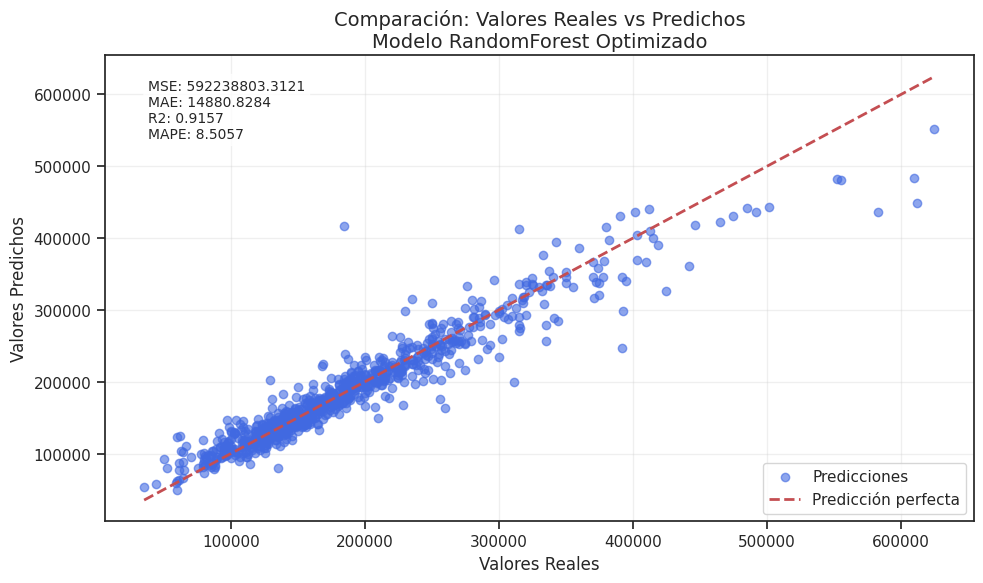

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import optuna
import warnings
warnings.filterwarnings('ignore')

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas (con protección MAPE)
def calcular_metricas(y_real, y_pred):
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    mask = y_real != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_real[mask] - y_pred[mask]) / y_real[mask])) * 100
    else:
        mape = np.nan

    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# =============================================
# Optimización con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización de Hiperparámetros con Optuna")
print("="*50)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            max_features=max_features,
            random_state=42,
            n_jobs=-1
        ))
    ])

    # Validación cruzada manual
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return np.mean(mse_scores)

# Configurar estudio Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Resultados Optuna
best_params = study.best_params
print("\nMejores parámetros encontrados:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Configurar modelo con mejores parámetros
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', RandomForestRegressor(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        max_features=best_params['max_features'],
        random_state=42,
        n_jobs=-1
    ))
])

# =============================================
# Evaluación en entrenamiento
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Entrenamiento")
print("="*50)

# Predicciones con validación cruzada
y_pred_train = cross_val_predict(best_model, X_train_final, y_train, cv=cv)
train_metrics = calcular_metricas(y_train, y_pred_train)

print("\nMétricas en entrenamiento (CV):")
display(pd.DataFrame([train_metrics]))

# Entrenar modelo final con todos los datos
best_model.fit(X_train_final, y_train)

# =============================================
# Evaluación en prueba
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba")
print("="*50)

y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("\nMétricas en prueba:")
display(pd.DataFrame([test_metrics]))

# =============================================
# Solo gráfico de predicciones vs reales
# =============================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo RandomForest Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#**9 Support Vector Machines Regressor**

[I 2025-05-26 03:54:54,066] A new study created in memory with name: no-name-ee844c59-d0e0-4f0b-82b5-7fdacc7590fe



Optimización de Hiperparámetros con Optuna


[I 2025-05-26 03:54:56,286] Trial 0 finished with value: 5562403525.238792 and parameters: {'kernel': 'rbf', 'C': 81.13135562823294, 'gamma': 'scale'}. Best is trial 0 with value: 5562403525.238792.
[I 2025-05-26 03:54:57,578] Trial 1 finished with value: 5924894344.701974 and parameters: {'kernel': 'poly', 'C': 0.9705814174953605, 'gamma': 'scale'}. Best is trial 0 with value: 5562403525.238792.
[I 2025-05-26 03:54:58,892] Trial 2 finished with value: 4654927853.772974 and parameters: {'kernel': 'poly', 'C': 4.202310639685195, 'gamma': 'scale'}. Best is trial 2 with value: 4654927853.772974.
[I 2025-05-26 03:55:00,182] Trial 3 finished with value: 5837180101.40082 and parameters: {'kernel': 'poly', 'C': 1.155313774419609, 'gamma': 'scale'}. Best is trial 2 with value: 4654927853.772974.
[I 2025-05-26 03:55:02,013] Trial 4 finished with value: 6397957217.135731 and parameters: {'kernel': 'rbf', 'C': 19.195126346463965, 'gamma': 'auto'}. Best is trial 2 with value: 4654927853.772974.
[I


Mejores parámetros encontrados:
kernel: poly
C: 4.34e+01
gamma: scale

Evaluación en Conjunto de Entrenamiento

Métricas en entrenamiento (CV):


,MSE,MAE,R2,MAPE
0,1.828720e+09,26312.316377,0.699509,15.098524



Evaluación en Conjunto de Prueba

Métricas en prueba:


,MSE,MAE,R2,MAPE
0,1.790272e+09,26148.512802,0.745317,13.933278


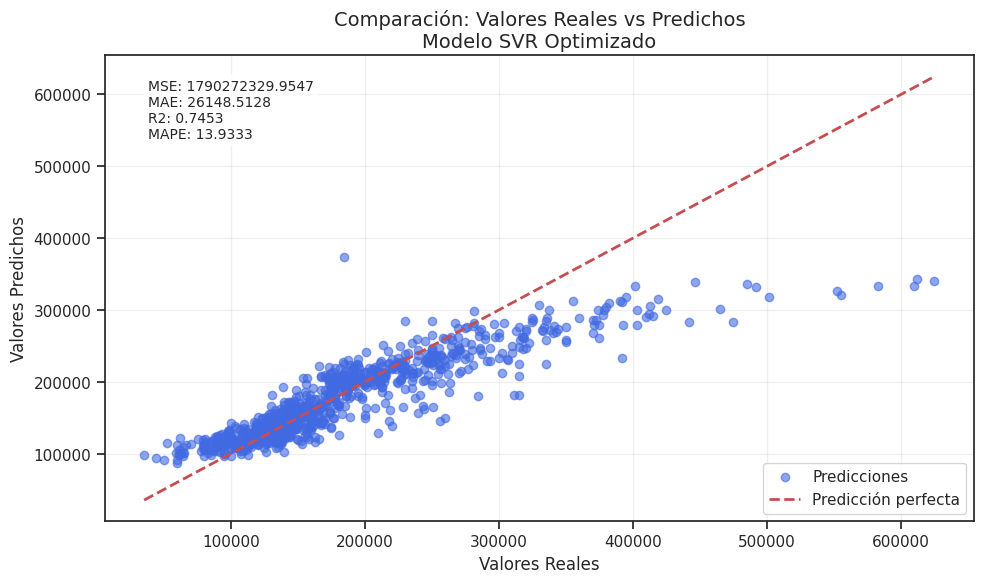

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import optuna
import warnings
warnings.filterwarnings('ignore')

# 1. Configuración de validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Función para calcular métricas
def calcular_metricas(y_real, y_pred):
    y_real = np.array(y_real)
    y_pred = np.array(y_pred)

    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    mask = y_real != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_real[mask] - y_pred[mask]) / y_real[mask])) * 100
    else:
        mape = np.nan

    return {'MSE': mse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

# 3. Pipeline base
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', svm.SVR())
])

# =============================================
# Optimización con Optuna
# =============================================
print("\n" + "="*50)
print("Optimización de Hiperparámetros con Optuna")
print("="*50)

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_float('C', 0.1, 100, log=True)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    model = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', svm.SVR(
            kernel=kernel,
            C=C,
            gamma=gamma
        ))
    ])

    # Validación cruzada manual
    mse_scores = []
    for train_idx, val_idx in cv.split(X_train_final):
        X_train_cv, X_val = X_train_final.iloc[train_idx], X_train_final.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)
        mse_scores.append(mean_squared_error(y_val, y_pred))

    return np.mean(mse_scores)

# Configurar estudio Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

# Resultados Optuna
best_params = study.best_params
print("\nMejores parámetros encontrados:")
print(f"kernel: {best_params['kernel']}")
print(f"C: {best_params['C']:.2e}")
print(f"gamma: {best_params['gamma']}")

# Configurar modelo con mejores parámetros
best_model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', svm.SVR(
        kernel=best_params['kernel'],
        C=best_params['C'],
        gamma=best_params['gamma']
    ))
])

# =============================================
# Evaluación en entrenamiento
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Entrenamiento")
print("="*50)

# Predicciones con validación cruzada
y_pred_train = cross_val_predict(best_model, X_train_final, y_train, cv=cv)
train_metrics = calcular_metricas(y_train, y_pred_train)

print("\nMétricas en entrenamiento (CV):")
display(pd.DataFrame([train_metrics]))

# Entrenar modelo final con todos los datos
best_model.fit(X_train_final, y_train)

# =============================================
# Evaluación en prueba
# =============================================
print("\n" + "="*50)
print("Evaluación en Conjunto de Prueba")
print("="*50)

y_pred_test = best_model.predict(X_test_final)
test_metrics = calcular_metricas(y_test, y_pred_test)

print("\nMétricas en prueba:")
display(pd.DataFrame([test_metrics]))

# =============================================
# Gráfico de dispersión
# =============================================
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         '--r', linewidth=2, label='Predicción perfecta')

plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.title('Comparación: Valores Reales vs Predichos\nModelo SVR Optimizado', fontsize=14)

# Añadir texto con métricas
textstr = '\n'.join([f'{k}: {v:.4f}' for k, v in test_metrics.items()])
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
              fontsize=10, verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()